## 1.1: Describe the project problem statement?
The team will utilize the data sources provided by this class to learn about the various types of people who live with obesity and fatty liver disease. We will then break the data down into groups such as age, gender, activity, and more to understand possible trends related to what aspects of an individual's life can increase the risk that their fatty liver disease will worsen. With the help of the co-efficient we also hope to interpret the influence of the key factors- like BMI, Activity level, Hypertension or Diabetes etc. to be able to provide targeted recommendations to our end consumers to keep their disease progression in control. 



### 1.2: How will the problem be tackled and solved?
We will utilize the various prediction models taught in this class to learn about the different types of people and parameters which influence fatty liver disease progression. We will then segment the data into different groups and train a model using scikitlearn to understand the relationships between the features and our outcome Severity- which answers the question "How severe is my disease", according to our initial understanding.


### 1.3: What are the parameters around your problem statement to make it simple enough to solve, but not trivial?: 
The parameters we are considering would be external factors of the individuals’ life which may have an impact on the severity of the FLD in the future. This would comprise data such as, history of diabetes, smoking status, daily activity level, history of heart disease and hypertension, etc. Because of that, the prediction might be able to address one of the toughest problem in FLD, which is monitoring. Since we are considering external factors, which is easily accessible and understandable because of it's categoric nature- the problem statement becomes simple in terms of progress keeping but not trivial since this is the only way patients can keep a track apart from liver biospy. 


### 1.4: What is the core business or research problem you are solving? Why is it important?
The main research problem we are solving is
* "What aspects of an individual’s life impacts the likelihood of them worsening FLD?" 
* "What percentage of each group has later stopped having FLD?"
* "What aspects of their life might influence that change?"
* By considering these questions we will learn about all of the possible sources of these health problems as well as any successful attempts to cure or alleviate them.
* Since the disease is very much indetectible without liver biopsy, it becomes impossible for the suffering individuals to track their disease progression and because of lack of medication, it can quickly progress into liver cancer. So given the situation, a prediction model to do the task with external bodily parameters is definitely invaluable. We are planning to convert this into a business problem, by offering this model as a complimentary service to our FLD affected consumers to increase the value of the product and the brand as well, while still addressing the major challenge of our consumer's life. 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.getcwd()


'/content/drive/.shortcut-targets-by-id/1X1rhhbmzbEuggyUw6qL3OPst0S2UXFoz/You 2.0/Data Science/Datasets_Python'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/You 2.0/Data Science/Datasets_Python')

2.0: The Data Set

To start with we had a pretty good quality dataset from medical and application perspective with information of people, suffering from various stages of FLD. But the downside was- it had 62 columns and 605 datapoints/rows. 

In [ ]:
df= pd.read_excel('NAFLD.xlsx')
df=df.rename(columns={'Gender (Female=1, Male=2)':'Gender',
                      'Diyabetes Mellitus (No=0, Yes=1)':'Diabetes',
                      'Hypertension (No=0, Yes=1)':'Hypertension', 
                      'Hyperlipidemia (No=0, Yes=1)':'Hyperlipidemia', 
                      'Metabolic syndrome (No=0, Yes=1)':'Metabolic syndrome', 
                      'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)':'Smoking Status', 
                      'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)':'Insulin resistance',
                      'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)':'NAS score>=4 and Fibrosis>=2',
                      'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)':'Fibrosis status',
                      'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)':'Significant Fibrosis',
                      'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)':'Advanced Fibrosis',
                      'Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)':'Cirrhosis',
                      'Diagnosis according to SAF (NASH=1, NAFL=2)':'Diagnosis according to SAF',
                      'Type of Disease (Mild illness=1, Severe illness=2)':'Severity'})
df.columns


Index(['Patient No.', 'Age', 'Gender', 'Height', 'Weight', 'Body Mass Index',
       'Waist Circumference', 'Hip Circumference', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Diabetes', 'Hypertension',
       'Hyperlipidemia', 'Metabolic syndrome', 'Smoking Status', 'AST', 'ALT',
       'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Microalbumin Spot Urine', 'Microalbumin/Creatinine Ratio',
       'TSH', 'CK', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'PT', 'INR',
       'Vitamin D', 'Ferritin', 'Ceruloplasmin', 'C Peptide', 'Glucose',
       'Insulin', 'HOMA', 'Insulin resistance', 'Uric Acid', 'BUN',
       'Creatinine', 'Hemoglobin - A1C', 'Steatosis', 'Activity', 'Fibrosis',
       'NAS score according to Kleiner', 'NAS score>=4 and Fibrosis>=2',
       'Fibrosis status', 'Significant Fibrosis', 'Advance

In [ ]:
df.to_csv('interim_clean_data.csv',index=False)

3.0: Data Cleaning:
Our Data cleaning journey began almost immediately because training model with 62 features seems pretty impossible atleast with less than a million rows. 
We initially deleted all the columns with more than 20% of null value cells. We have then replaced the null values with mean for continuos variables and for categorical variables with the highest populated class. 

In [ ]:
df.Gender=df.Gender.astype(str)
df.Steatosis=df.Steatosis.astype(str)
df.Fibrosis=df.Fibrosis.astype(str)
df['NAS score according to Kleiner'] = df['NAS score according to Kleiner'].astype(str)
df.Activity=df.Activity.astype(str)

In [ ]:
df.Diabetes=df.Diabetes.astype(str)

In [ ]:
df.Severity=df.Severity.astype(str)
df.Hypertension=df.Hypertension.astype(str)
df.Hyperlipidemia=df.Hyperlipidemia.astype(str)
df['Metabolic syndrome'] = df['Metabolic syndrome'].astype(str)
df['Smoking Status'] = df['Smoking Status'].astype(str)
df['Insulin resistance'] = df['Insulin resistance'].astype(str)
df['NAS score>=4 and Fibrosis>=2'] = df['NAS score>=4 and Fibrosis>=2'].astype(str)
df['Fibrosis status'] = df['Fibrosis status'].astype(str)
df['Significant Fibrosis'] = df['Significant Fibrosis'].astype(str)
df['Advanced Fibrosis'] = df['Advanced Fibrosis'].astype(str)
df['Cirrhosis'] = df['Cirrhosis'].astype(str)
df['Diagnosis according to SAF'] = df['Diagnosis according to SAF'].astype(str)
df['Patient No.'] = df['Patient No.'].astype(str)

In [ ]:
df['Patient No.']

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
600    601.0
601    602.0
602    603.0
603    604.0
604    605.0
Name: Patient No., Length: 605, dtype: object

In [ ]:
np.sort(df.Age.unique())

array([18., 21., 22., 23., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
       47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 67., 68., 70., 71.])

In [ ]:
sns.set()
df.Steatosis.unique()

array(['2.0', '3.0', '1.0'], dtype=object)

In [ ]:
df[df.Steatosis=='1.0'].Fibrosis.unique()

array(['1.0', '0.0', '3.0', '4.0', '2.0'], dtype=object)

In [ ]:
df[df.Steatosis=='1.0'].Cirrhosis.unique()

array(['0.0', '1.0'], dtype=object)

In [ ]:
df[(df.Steatosis=='1.0') & (df.Cirrhosis=='1.0')]

,Patient No.,Age,Gender,Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,NAS score>=4 and Fibrosis>=2,Fibrosis status,Significant Fibrosis,Advanced Fibrosis,Cirrhosis,Diagnosis according to SAF,Severity
467,468.0,51.0,1.0,159.0,86.0,34.00,114.0,105.0,120.0,70.0,...,2.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
468,469.0,51.0,1.0,159.0,86.0,34.02,114.0,105.0,120.0,70.0,...,2.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
491,492.0,58.0,2.0,184.0,86.0,25.40,106.0,94.0,148.0,92.0,...,2.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
512,513.0,60.0,2.0,167.0,110.0,39.30,116.0,124.0,134.0,79.0,...,3.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
515,516.0,48.0,2.0,176.0,104.0,33.45,108.0,115.0,140.0,95.0,...,2.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
578,579.0,60.0,1.0,145.0,83.0,39.48,125.0,116.0,110.0,70.0,...,3.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
579,580.0,70.0,1.0,160.0,73.0,28.52,NaN,96.0,120.0,80.0,...,3.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
580,581.0,54.0,1.0,157.0,80.0,32.46,100.0,106.0,150.0,90.0,...,2.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
593,594.0,59.0,1.0,155.0,84.0,34.96,117.0,104.0,142.0,92.0,...,4.0,4.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0


In [ ]:
df[df.Severity=='2.0']

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
for col in ['Microalbumin Spot Urine','Microalbumin/Creatinine Ratio','TSH','CK','Vitamin D','Ceruloplasmin','C Peptide','Insulin','HOMA','Uric Acid','BUN','Creatinine']:
  del df[col]

In [ ]:
del df['PT']

We have cleaned the data by partially using Subject Matter Expertise- clubbing the similar information delivering features and then looking at their collinearity. 

## Karl Pearson's Formula of Colinearity

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
df[['Height','Weight','Body Mass Index']].corr()

,Height,Weight,Body Mass Index
Height,1.000000,0.439802,-0.296724
Weight,0.439802,1.000000,0.719885
Body Mass Index,-0.296724,0.719885,1.000000


In [ ]:
fig = ff.create_annotated_heatmap(df[['Height','Weight','Waist Circumference','Hip Circumference','Body Mass Index']].corr().values.tolist(),
                                   
                                  y=df[['Height','Weight','Waist Circumference','Hip Circumference','Body Mass Index']].columns.tolist(),
                                  x=df[['Height','Weight','Waist Circumference','Hip Circumference','Body Mass Index']].columns.tolist(), 
                                  colorscale='Inferno',
                                  showscale=True
                                 )


In [ ]:
fig.show()

Like in this example we have clubbed BMI, Weight, Height, Waist Circumference and Hip Circumference together since all of them were co-related and used to calculate BMI, which is used in the prediction of obesity according to the doctors. BMI is extensively used in FLD prediction and progress checking by the doctors as well.

In [ ]:
for col in ['Height','Weight','Waist Circumference','Hip Circumference']:
  del df[col]

In [ ]:
for col in ['Systolic Blood Pressure','Diastolic Blood Pressure']:
  del df[col]

In [ ]:
del df['INR']

In [ ]:
fig = ff.create_annotated_heatmap(df[['Total Bilirubin','Direct Bilirubin']].corr().values.tolist(),
                                   
                                  y=df[['Total Bilirubin','Direct Bilirubin']].columns.tolist(),
                                  x=df[['Total Bilirubin','Direct Bilirubin']].columns.tolist(), 
                                  colorscale='Inferno',
                                  showscale=True
                                 )
fig.show()

The same thing for Direct and Total Billirubin. While total billirubin also has a component of direct billirubin but direct billirubin is extensively used and is an direct indicator of FLD. Also, we learnt after exploration that our data set only contains details of FLD diagonized patients, so total billirubin and almost most of the blood report data would not be able to tell us a lot about the dataset or show a huge variation because all those are already in detrimental condition. This understanding was a key to our model as we believe our most efficient model does not incorporate any blood reports and hence will also be easily usable by the end consumers.

In [ ]:
del df['Total Bilirubin']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient No.                     605 non-null    object 
 1   Age                             605 non-null    float64
 2   Gender                          605 non-null    object 
 3   Body Mass Index                 605 non-null    float64
 4   Diabetes                        605 non-null    object 
 5   Hypertension                    605 non-null    object 
 6   Hyperlipidemia                  605 non-null    object 
 7   Metabolic syndrome              605 non-null    object 
 8   Smoking Status                  605 non-null    object 
 9   AST                             605 non-null    float64
 10  ALT                             605 non-null    float64
 11  ALP                             604 non-null    float64
 12  GGT                             602 

In [ ]:
df[df.Severity=='2.0'].Cirrhosis.unique()

array(['0.0', '1.0'], dtype=object)

In [ ]:
df['LDH'].isnull().values.any()

True

In [ ]:
df.isnull().sum()

Patient No.                        0
Age                                0
Gender                             0
Body Mass Index                    0
Diabetes                           0
Hypertension                       0
Hyperlipidemia                     0
Metabolic syndrome                 0
Smoking Status                     0
AST                                0
ALT                                0
ALP                                1
GGT                                3
LDH                               44
Direct Bilirubin                   1
Total Protein                     82
Albumin                            0
Total Cholesterol                  0
Triglycerides                      1
HDL                                1
LDL                                3
Leukocyte                          1
Hemoglobin                         1
Trombosit                          1
Mean Corpuscular Volume            2
Mean Platelet Volume              14
Ferritin                          17
G

In [ ]:
import numpy as np

df = df.replace('', np.nan)
df = df.replace(' ', np.nan)

print(df.shape)
df.isnull().sum()

(605, 41)


Patient No.                        0
Age                                0
Gender                             0
Body Mass Index                    0
Diabetes                           0
Hypertension                       0
Hyperlipidemia                     0
Metabolic syndrome                 0
Smoking Status                     0
AST                                0
ALT                                0
ALP                                1
GGT                                3
LDH                               44
Direct Bilirubin                   1
Total Protein                     82
Albumin                            0
Total Cholesterol                  0
Triglycerides                      1
HDL                                1
LDL                                3
Leukocyte                          1
Hemoglobin                         1
Trombosit                          1
Mean Corpuscular Volume            2
Mean Platelet Volume              14
Ferritin                          17
G

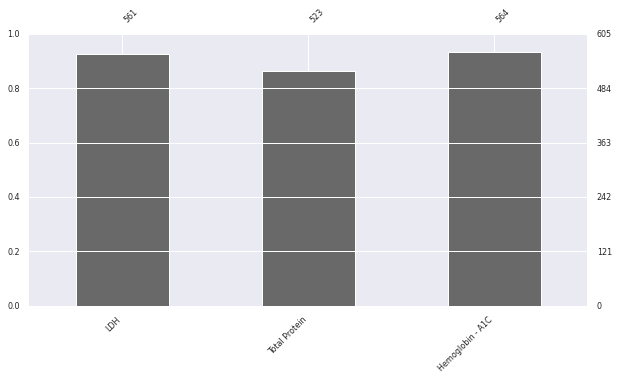

In [ ]:
import missingno

variables_missing = ['LDH','Total Protein','Hemoglobin - A1C']
X = df.loc[:, df.columns.isin(variables_missing)]

missingno.bar(X, figsize=(10,5), fontsize=8)

In [ ]:
df[(df.Diabetes=='0.0') & (df['Hemoglobin - A1C']>=5.7)]

,Patient No.,Age,Gender,Body Mass Index,Diabetes,Hypertension,Hyperlipidemia,Metabolic syndrome,Smoking Status,AST,...,Activity,Fibrosis,NAS score according to Kleiner,NAS score>=4 and Fibrosis>=2,Fibrosis status,Significant Fibrosis,Advanced Fibrosis,Cirrhosis,Diagnosis according to SAF,Severity
22,23.0,62.0,2.0,31.12,0.0,0.0,0.0,0.0,nan,50.0,...,2.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
23,24.0,33.0,2.0,31.64,0.0,0.0,1.0,1.0,3.0,25.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
24,25.0,42.0,2.0,33.91,0.0,0.0,1.0,1.0,2.0,39.0,...,2.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
25,26.0,39.0,1.0,32.10,0.0,0.0,1.0,1.0,1.0,18.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
26,27.0,38.0,2.0,32.00,0.0,0.0,1.0,0.0,1.0,41.0,...,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,589.0,47.0,2.0,30.85,0.0,0.0,1.0,0.0,1.0,102.0,...,4.0,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0
589,590.0,59.0,1.0,25.88,0.0,1.0,0.0,0.0,3.0,60.0,...,4.0,3.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
590,591.0,41.0,2.0,30.79,0.0,0.0,1.0,0.0,2.0,37.0,...,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
591,592.0,54.0,1.0,34.20,0.0,0.0,0.0,0.0,1.0,58.0,...,3.0,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0


In [ ]:
df['NAS score according to Kleiner'].unique()

array(['4.0', '5.0', '6.0', '7.0', '8.0', '1.0', '2.0', '3.0'],
      dtype=object)

In [ ]:
df['NAS score>=4 and Fibrosis>=2'].unique()

array(['1.0', '0.0'], dtype=object)

In [ ]:
df['Cirrhosis'].unique()

array(['0.0', '1.0'], dtype=object)

In [ ]:
df[(df['Fibrosis status']=='0.0') & (df['Hemoglobin - A1C']>5.7)]

,Patient No.,Age,Gender,Body Mass Index,Diabetes,Hypertension,Hyperlipidemia,Metabolic syndrome,Smoking Status,AST,...,Activity,Fibrosis,NAS score according to Kleiner,NAS score>=4 and Fibrosis>=2,Fibrosis status,Significant Fibrosis,Advanced Fibrosis,Cirrhosis,Diagnosis according to SAF,Severity
25,26.0,39.0,1.0,32.10,0.0,0.0,1.0,1.0,1.0,18.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
28,29.0,44.0,2.0,27.85,0.0,0.0,1.0,1.0,2.0,68.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
29,30.0,47.0,1.0,42.04,1.0,0.0,0.0,1.0,2.0,19.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
34,35.0,57.0,2.0,27.68,1.0,0.0,1.0,1.0,2.0,35.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
37,38.0,40.0,1.0,31.24,1.0,0.0,0.0,1.0,2.0,40.0,...,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,568.0,48.0,2.0,30.36,1.0,1.0,1.0,1.0,2.0,27.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
570,571.0,52.0,1.0,31.60,0.0,0.0,1.0,1.0,2.0,32.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
576,577.0,60.0,1.0,40.79,1.0,1.0,1.0,1.0,2.0,19.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
590,591.0,41.0,2.0,30.79,0.0,0.0,1.0,0.0,2.0,37.0,...,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient No.                     605 non-null    object 
 1   Age                             605 non-null    float64
 2   Gender                          605 non-null    object 
 3   Body Mass Index                 605 non-null    float64
 4   Diabetes                        605 non-null    object 
 5   Hypertension                    605 non-null    object 
 6   Hyperlipidemia                  605 non-null    object 
 7   Metabolic syndrome              605 non-null    object 
 8   Smoking Status                  605 non-null    object 
 9   AST                             605 non-null    float64
 10  ALT                             605 non-null    float64
 11  ALP                             604 non-null    float64
 12  GGT                             602 

In [ ]:
 df.loc[df['Hemoglobin - A1C']>=6.5, 'Diabetes']='1.0'

In [ ]:
 df.loc[df['Diabetes']=='1.0', 'Diabetes']='2.0'

In [ ]:
df.loc[df['Hemoglobin - A1C'].between(5.7,6.4), 'Diabetes']='1.0'

In [ ]:
df.loc[df['Hemoglobin - A1C']<5.7, 'Diabetes']='0.0'

In [ ]:
df['Diabetes'].unique()

array(['0.0', '1.0', '2.0'], dtype=object)

In [ ]:
del df['Hemoglobin - A1C']

In [ ]:
del df['Glucose']

In [ ]:
df=df.rename(columns={'NAS score according to Kleiner':'NAS'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient No.                   605 non-null    object 
 1   Age                           605 non-null    float64
 2   Gender                        605 non-null    object 
 3   Body Mass Index               605 non-null    float64
 4   Diabetes                      605 non-null    object 
 5   Hypertension                  605 non-null    object 
 6   Hyperlipidemia                605 non-null    object 
 7   Metabolic syndrome            605 non-null    object 
 8   Smoking Status                605 non-null    object 
 9   AST                           605 non-null    float64
 10  ALT                           605 non-null    float64
 11  ALP                           604 non-null    float64
 12  GGT                           602 non-null    float64
 13  LDH  

In [ ]:
df[df['Diagnosis according to SAF']=='2.0'].Steatosis.unique()

array(['2.0', '3.0', '1.0'], dtype=object)

In [ ]:

df[df['Diagnosis according to SAF']=='1.0'].NAS.unique()

array(['4.0', '5.0', '6.0', '7.0', '8.0', '3.0'], dtype=object)

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Age                          46.302479
Body Mass Index              31.868711
AST                          48.723636
ALT                          76.523967
ALP                         108.751656
GGT                          69.121262
LDH                         249.231729
Direct Bilirubin              0.210000
Total Protein                 7.782409
Albumin                       4.670397
Total Cholesterol           209.702479
Triglycerides               190.847682
HDL                          45.390132
LDL                         133.946844
Leukocyte                  7248.725166
Hemoglobin                   14.318675
Trombosit                   241.925497
Mean Corpuscular Volume      85.488723
Mean Platelet Volume          8.790068
Ferritin                    129.078197
dtype: float64

In [ ]:
column_means = df.mean()
df = df.fillna(column_means)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient No.                   605 non-null    object 
 1   Age                           605 non-null    float64
 2   Gender                        605 non-null    object 
 3   Body Mass Index               605 non-null    float64
 4   Diabetes                      605 non-null    object 
 5   Hypertension                  605 non-null    object 
 6   Hyperlipidemia                605 non-null    object 
 7   Metabolic syndrome            605 non-null    object 
 8   Smoking Status                605 non-null    object 
 9   AST                           605 non-null    float64
 10  ALT                           605 non-null    float64
 11  ALP                           605 non-null    float64
 12  GGT                           605 non-null    float64
 13  LDH  

In [ ]:
df.loc[df['Diagnosis according to SAF']=='1.0', 'Steatosis']='4.0'
df.loc[df['Fibrosis status']=='1.0', 'Steatosis']='5.0'
df.loc[df['Significant Fibrosis']=='1.0', 'Steatosis']='6.0'
df.loc[df['Advanced Fibrosis']=='1.0', 'Steatosis']='7.0'
df.loc[df['Cirrhosis']=='1.0', 'Steatosis']='8.0'

In [ ]:
 df.Steatosis.unique()

array(['5.0', '4.0', '7.0', '6.0', '2.0', '8.0', '3.0', '1.0'],
      dtype=object)

In [ ]:
df=df.rename(columns={'Steatosis':'Stage'})
for col in ['Fibrosis','NAS', 'NAS score>=4 and Fibrosis>=2', 'Fibrosis status', 'Significant Fibrosis', 'Advanced Fibrosis', 'Cirrhosis', 'Diagnosis according to SAF']:
  del df[col]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient No.              605 non-null    object 
 1   Age                      605 non-null    float64
 2   Gender                   605 non-null    object 
 3   Body Mass Index          605 non-null    float64
 4   Diabetes                 605 non-null    object 
 5   Hypertension             605 non-null    object 
 6   Hyperlipidemia           605 non-null    object 
 7   Metabolic syndrome       605 non-null    object 
 8   Smoking Status           605 non-null    object 
 9   AST                      605 non-null    float64
 10  ALT                      605 non-null    float64
 11  ALP                      605 non-null    float64
 12  GGT                      605 non-null    float64
 13  LDH                      605 non-null    float64
 14  Direct Bilirubin         6

## EDA: Data Visualization


In [ ]:
trial_1=df[["Diabetes", "Age", "Body Mass Index"]].groupby(["Diabetes", "Age"]).mean().reset_index(drop=False).pivot("Diabetes", "Age", "Body Mass Index")

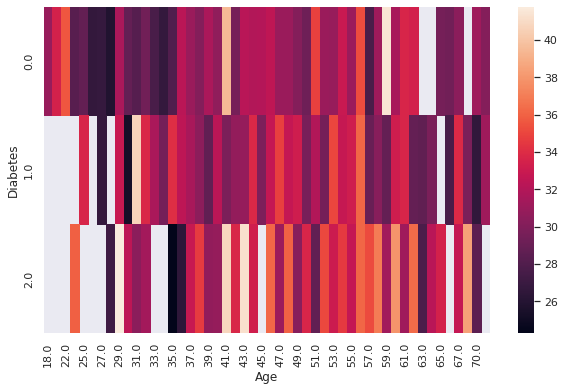

In [ ]:
ax = sns.heatmap(trial_1)

With this heatmap, we can see that people who have diabetes, and are middle aged (40-45) have particularly high BMI that the other age groups. 

In [ ]:
df[['Diabetes','Gender','Patient No.']].groupby(['Diabetes','Gender']).count()

Patient No.
Diabetes Gender             
0.0      1.0             104
         2.0             172
1.0      1.0              92
         2.0              97
2.0      1.0              88
         2.0              52

## Trial Heatmaps Here

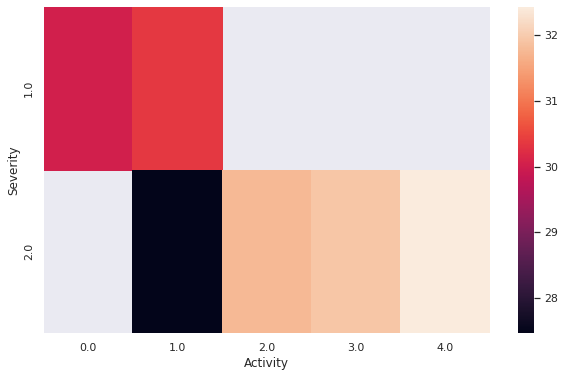

In [ ]:
trial_2=df[["Severity", "Activity", "Body Mass Index"]].groupby(["Severity", "Activity"]).mean().reset_index(drop=False).pivot("Severity", "Activity", "Body Mass Index")
ax = sns.heatmap(trial_2)

This supports the hypothesis that as activity decreases from 1-4 the BMI increases and severity is higher. This might indicate that Activity is a very important factor in predicting the severity of the FLD.

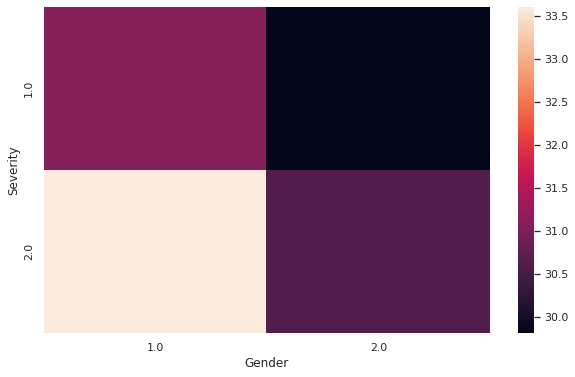

In [ ]:
trial_2=df[["Severity", "Gender", "Body Mass Index"]].groupby(["Severity", "Gender"]).mean().reset_index(drop=False).pivot("Severity", "Gender", "Body Mass Index")
ax = sns.heatmap(trial_2)

This is an interesting observation where we see that Women (gender 1) have particularly higher BMI than the male counterparts, even though they have similar Severity. 

In [ ]:
trial_2

Gender,1.0,2.0
Severity,,
1.0,31.089545,29.815676
2.0,33.598779,30.600493


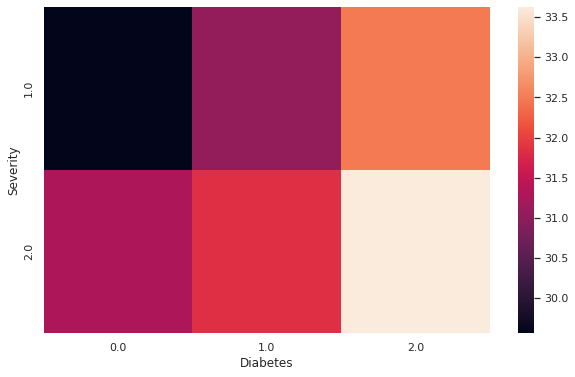

In [ ]:
trial_3=df[["Severity", "Diabetes", "Body Mass Index"]].groupby(["Severity", "Diabetes"]).mean().reset_index(drop=False).pivot("Severity", "Diabetes", "Body Mass Index")
ax = sns.heatmap(trial_3)

This supports the hypothesis that other ailments such as diabetes influences Severity and BMI. The distribution shows a direct relation/impact of Diabetes in predicting the severity of the FLD.

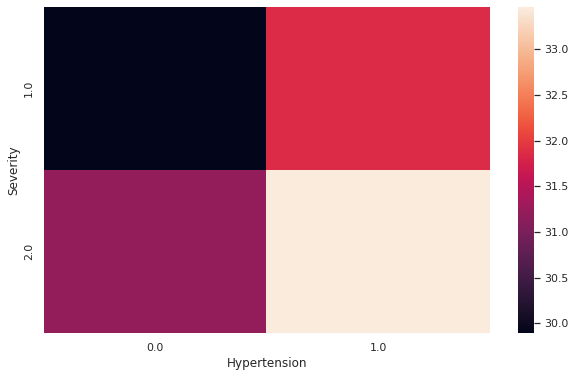

In [ ]:
trial_4=df[["Severity", "Hypertension", "Body Mass Index"]].groupby(["Severity", "Hypertension"]).mean().reset_index(drop=False).pivot("Severity", "Hypertension", "Body Mass Index")
ax = sns.heatmap(trial_4)

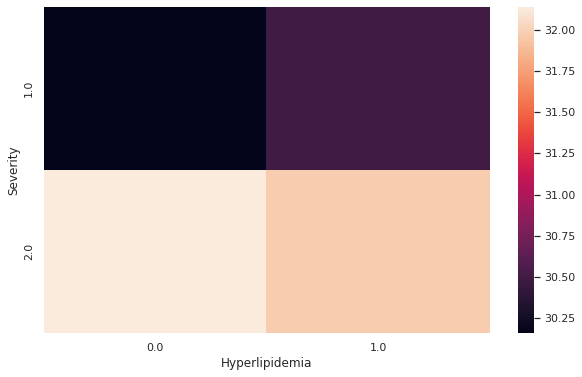

In [ ]:
trial_5=df[["Severity", "Hyperlipidemia", "Body Mass Index"]].groupby(["Severity", "Hyperlipidemia"]).mean().reset_index(drop=False).pivot("Severity", "Hyperlipidemia", "Body Mass Index")
ax = sns.heatmap(trial_5)

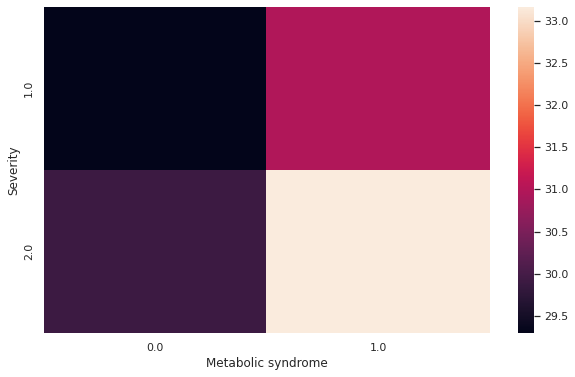

In [ ]:
trial_6=df[["Severity", "Metabolic syndrome", "Body Mass Index"]].groupby(["Severity", "Metabolic syndrome"]).mean().reset_index(drop=False).pivot("Severity", "Metabolic syndrome", "Body Mass Index")
ax = sns.heatmap(trial_6)

We see similar trend with other ailments such as Hypertension, Hypolipedemia. They both might behave similar to Diabetes's impact on prediction.

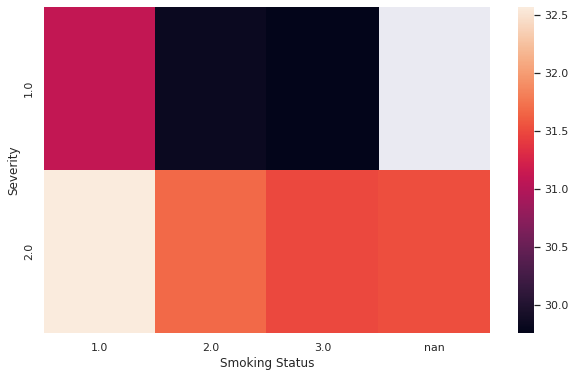

In [ ]:
trial_6=df[["Severity", "Smoking Status", "Body Mass Index"]].groupby(["Severity", "Smoking Status"]).mean().reset_index(drop=False).pivot("Severity", "Smoking Status", "Body Mass Index")
ax = sns.heatmap(trial_6)

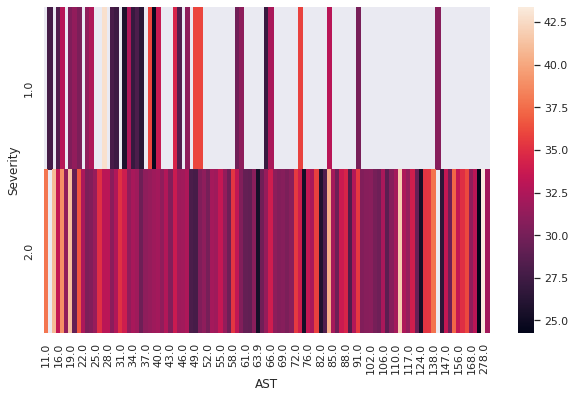

In [ ]:
trial_7=df[["Severity", "AST", "Body Mass Index"]].groupby(["Severity", "AST"]).mean().reset_index(drop=False).pivot("Severity", "AST", "Body Mass Index")
ax = sns.heatmap(trial_7)

This heat map shows for some reason people with lower AST count and who have higher BMI are in more severe category, although it is not commentable since we need more data points for less severe disease to understand the trend accurately. But we can commend that AST of 11-19 definitely show more BMI and may be particularly interesting. 

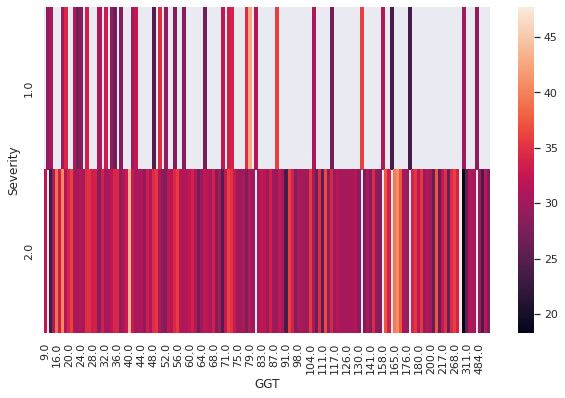

In [ ]:
trial_9=df[["Severity", "GGT", "Body Mass Index"]].groupby(["Severity", "GGT"]).mean().reset_index(drop=False).pivot("Severity", "GGT", "Body Mass Index")
ax = sns.heatmap(trial_9)

Similar trend observed in GGT 16.5-17.6

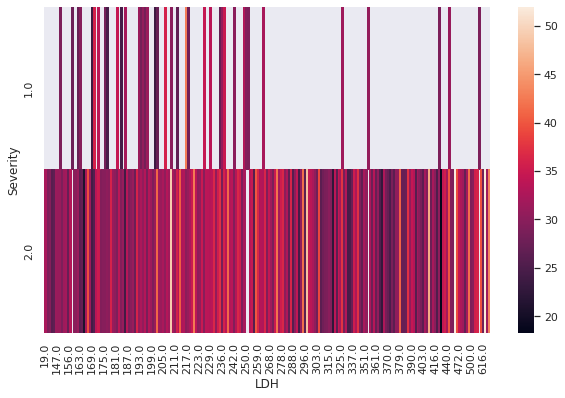

In [ ]:
trial_10=df[["Severity", "LDH", "Body Mass Index"]].groupby(["Severity", "LDH"]).mean().reset_index(drop=False).pivot("Severity", "LDH", "Body Mass Index")
ax = sns.heatmap(trial_10)

This might not be a important parameter specially because the lack of any variation in BMI trend.

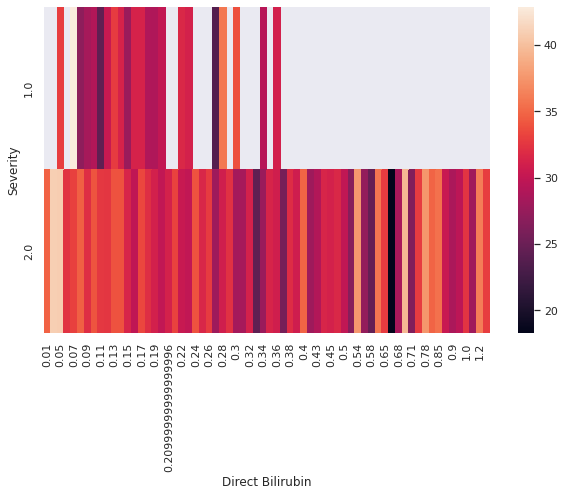

In [ ]:
trial_12=df[["Severity", "Direct Bilirubin", "Body Mass Index"]].groupby(["Severity", "Direct Bilirubin"]).mean().reset_index(drop=False).pivot("Severity", "Direct Bilirubin", "Body Mass Index")
ax = sns.heatmap(trial_12)

Similar observation

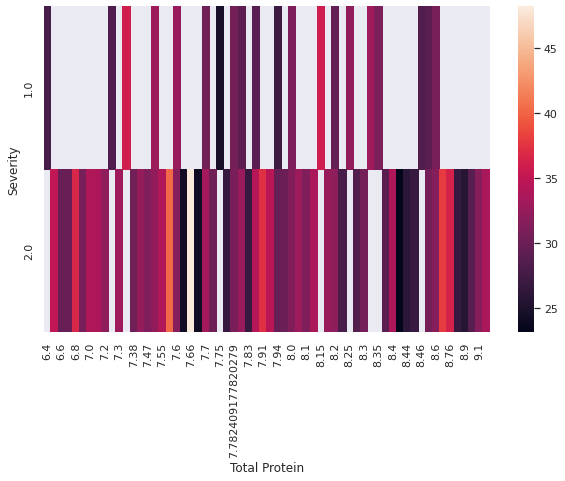

In [ ]:
trial_13=df[["Severity", "Total Protein", "Body Mass Index"]].groupby(["Severity", "Total Protein"]).mean().reset_index(drop=False).pivot("Severity", "Total Protein", "Body Mass Index")
ax = sns.heatmap(trial_13)

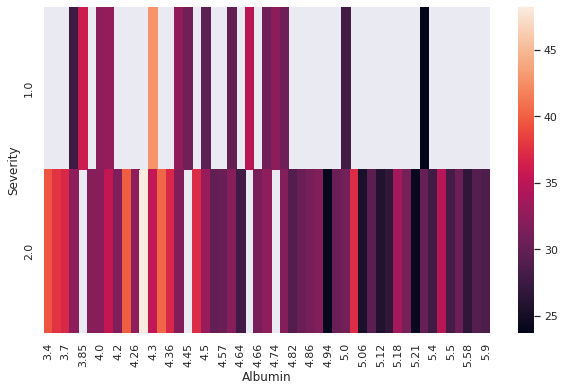

In [ ]:
trial_14=df[["Severity", "Albumin", "Body Mass Index"]].groupby(["Severity", "Albumin"]).mean().reset_index(drop=False).pivot("Severity", "Albumin", "Body Mass Index")
ax = sns.heatmap(trial_14)

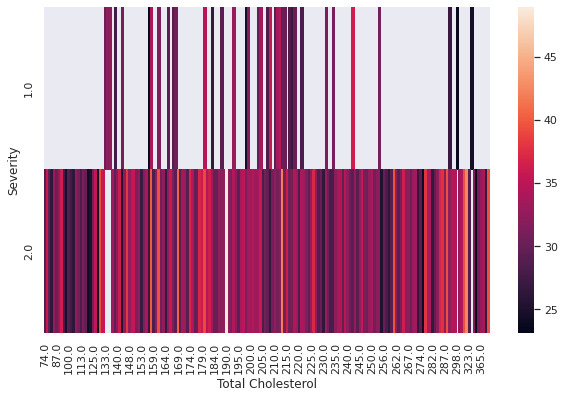

In [ ]:
trial_15=df[["Severity", "Total Cholesterol", "Body Mass Index"]].groupby(["Severity", "Total Cholesterol"]).mean().reset_index(drop=False).pivot("Severity", "Total Cholesterol", "Body Mass Index")
ax = sns.heatmap(trial_15)

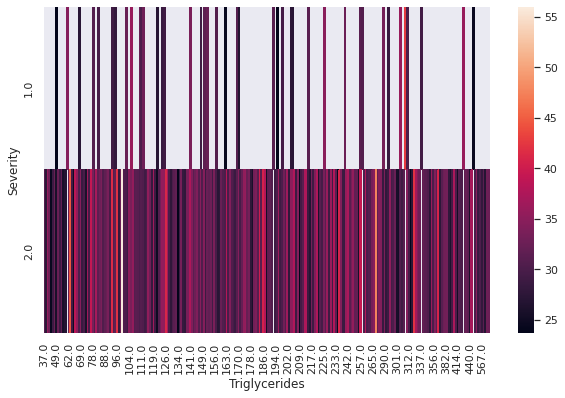

In [ ]:
trial_16=df[["Severity", "Triglycerides", "Body Mass Index"]].groupby(["Severity", "Triglycerides"]).mean().reset_index(drop=False).pivot("Severity", "Triglycerides", "Body Mass Index")
ax = sns.heatmap(trial_16)

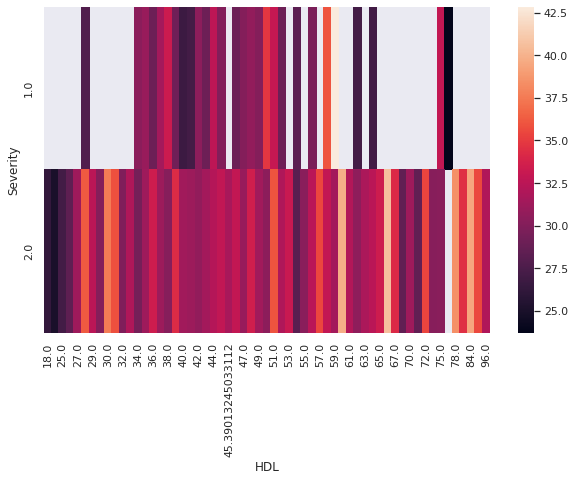

In [ ]:
trial_17=df[["Severity", "HDL", "Body Mass Index"]].groupby(["Severity", "HDL"]).mean().reset_index(drop=False).pivot("Severity", "HDL", "Body Mass Index")
ax = sns.heatmap(trial_17)

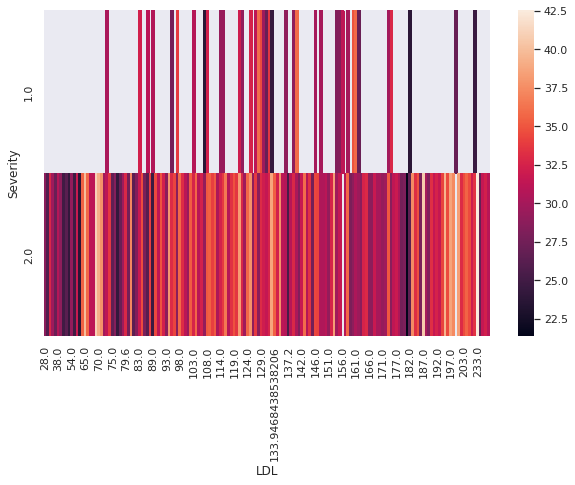

In [ ]:
trial_18=df[["Severity", "LDL", "Body Mass Index"]].groupby(["Severity", "LDL"]).mean().reset_index(drop=False).pivot("Severity", "LDL", "Body Mass Index")
ax = sns.heatmap(trial_18)

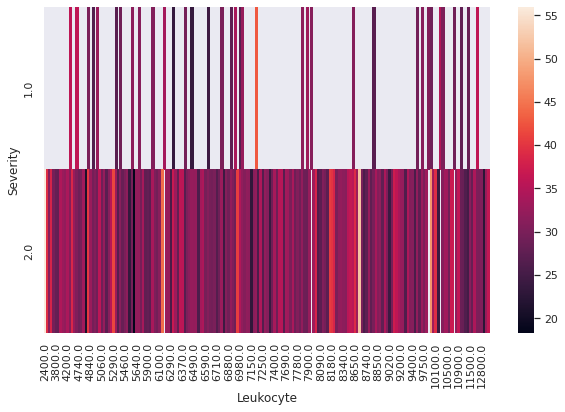

In [ ]:
trial_23=df[["Severity", "Leukocyte", "Body Mass Index"]].groupby(["Severity", "Leukocyte"]).mean().reset_index(drop=False).pivot("Severity", "Leukocyte", "Body Mass Index")
ax = sns.heatmap(trial_23)

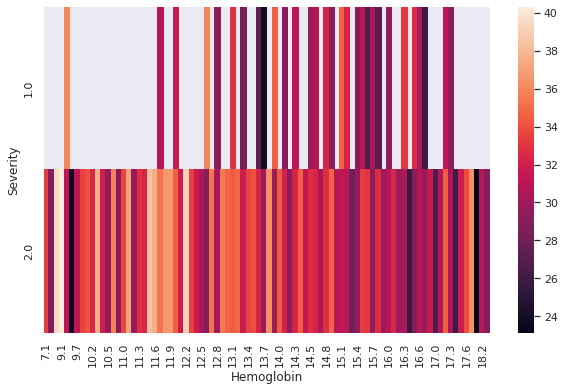

In [ ]:
trial_24=df[["Severity", "Hemoglobin", "Body Mass Index"]].groupby(["Severity", "Hemoglobin"]).mean().reset_index(drop=False).pivot("Severity", "Hemoglobin", "Body Mass Index")
ax = sns.heatmap(trial_24)

Unlike the other blood reports, this graph is pretty interesting specially with the variation in BMI in more severe cases- for people who have a little lower Hemoglobin than recommended. Subject matter also validates this as people with more severe FLD are prone to intestinal bleeding which can render lower Hemoglobin values. It will be interesting to see the influence of Hemoglobin in the prediction model.

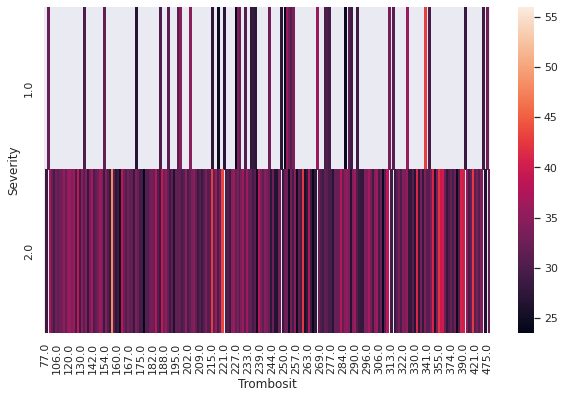

In [ ]:
trial_25=df[["Severity", "Trombosit", "Body Mass Index"]].groupby(["Severity", "Trombosit"]).mean().reset_index(drop=False).pivot("Severity", "Trombosit", "Body Mass Index")
ax = sns.heatmap(trial_25)

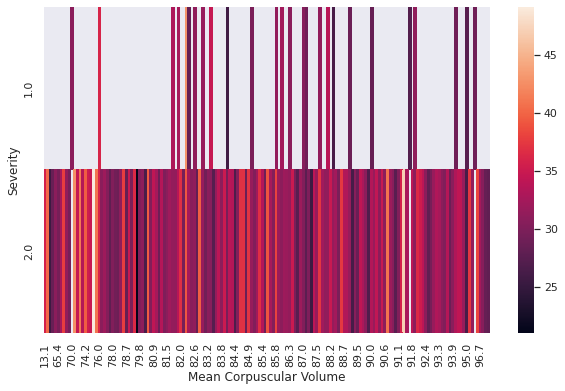

In [ ]:
trial_26=df[["Severity", "Mean Corpuscular Volume", "Body Mass Index"]].groupby(["Severity", "Mean Corpuscular Volume"]).mean().reset_index(drop=False).pivot("Severity", "Mean Corpuscular Volume", "Body Mass Index")
ax = sns.heatmap(trial_26)

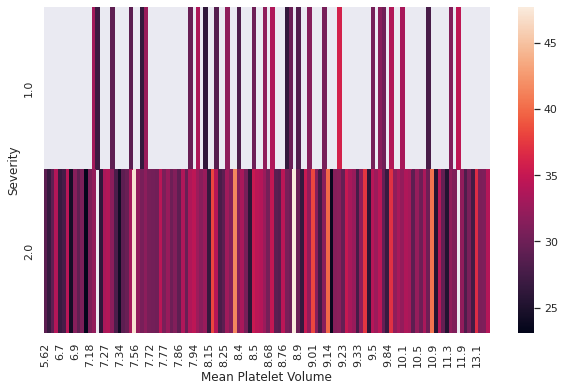

In [ ]:
trial_27=df[["Severity", "Mean Platelet Volume", "Body Mass Index"]].groupby(["Severity", "Mean Platelet Volume"]).mean().reset_index(drop=False).pivot("Severity", "Mean Platelet Volume", "Body Mass Index")
ax = sns.heatmap(trial_27)

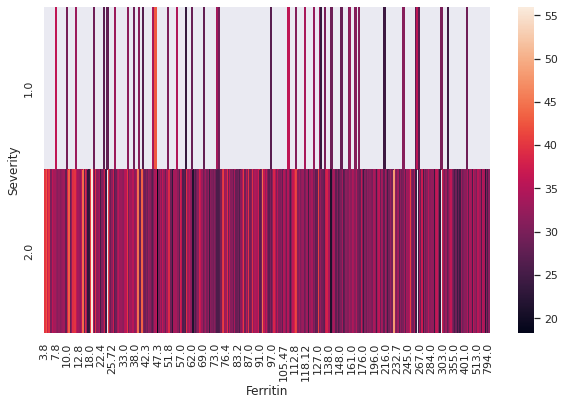

In [ ]:
trial_31=df[["Severity", "Ferritin", "Body Mass Index"]].groupby(["Severity", "Ferritin"]).mean().reset_index(drop=False).pivot("Severity", "Ferritin", "Body Mass Index")
ax = sns.heatmap(trial_31)

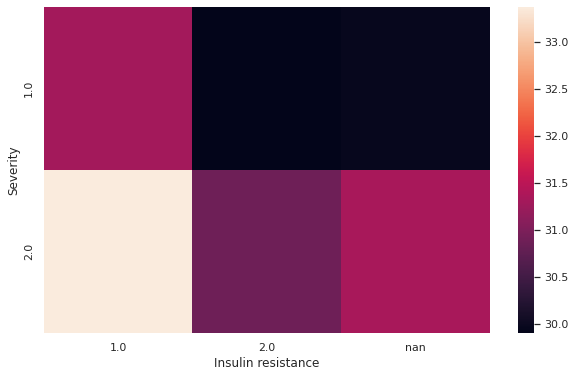

In [ ]:
trial_36=df[["Severity", "Insulin resistance", "Body Mass Index"]].groupby(["Severity", "Insulin resistance"]).mean().reset_index(drop=False).pivot("Severity", "Insulin resistance", "Body Mass Index")
ax = sns.heatmap(trial_36)

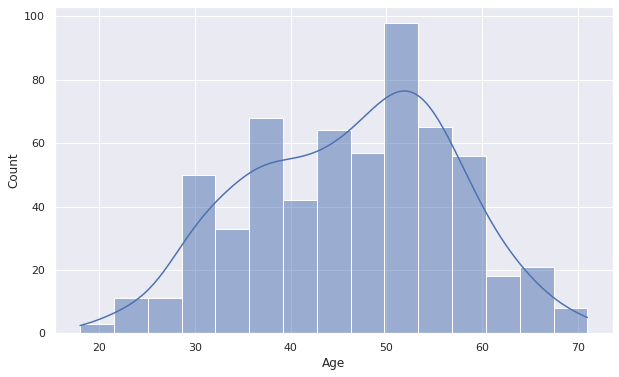

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

sns.histplot(data=df,
            x="Age",kde=True)

This graph gives more confidence about the sample size to be a true representation of the population since FLD is generally also highly prevalent in older age groups (40-60)

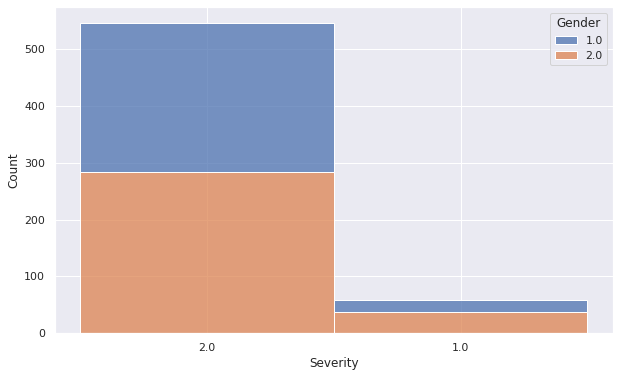

In [ ]:
sns.histplot(data=df,
            x="Severity", hue="Gender", multiple="stack")

These graphs definitely eliminate the fear of gender bias in the model

In [ ]:
del df['Insulin resistance']

In [ ]:
df.to_csv('clean_data.csv',index=False)

## Table


In [ ]:
pip install tableone

In [ ]:
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne, load_dataset

In [ ]:
df.head()

,Patient No.,Age,Gender,Body Mass Index,Diabetes,Hypertension,Hyperlipidemia,Metabolic syndrome,Smoking Status,AST,...,LDL,Leukocyte,Hemoglobin,Trombosit,Mean Corpuscular Volume,Mean Platelet Volume,Ferritin,Stage,Activity,Severity
0,1.0,60.0,1.0,35.56,0.0,1.0,1.0,0.0,2.0,27.0,...,95.0,7300.0,12.7,217.0,85.5,9.2,524.0,5.0,2.0,2.0
1,2.0,55.0,1.0,30.78,0.0,0.0,0.0,0.0,1.0,17.0,...,97.0,6000.0,12.9,275.0,76.3,8.1,41.3,4.0,2.0,2.0
2,3.0,53.0,2.0,34.95,0.0,1.0,1.0,1.0,2.0,51.0,...,103.0,7700.0,13.5,205.0,90.0,9.3,294.0,7.0,2.0,2.0
3,4.0,33.0,2.0,31.02,0.0,0.0,1.0,1.0,2.0,31.0,...,102.0,7300.0,15.1,342.0,82.0,7.1,46.0,5.0,2.0,2.0
4,5.0,23.0,2.0,25.91,0.0,0.0,0.0,0.0,2.0,32.0,...,144.0,7000.0,17.4,210.0,88.0,7.4,158.0,4.0,2.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient No.              605 non-null    object 
 1   Age                      605 non-null    float64
 2   Gender                   605 non-null    object 
 3   Body Mass Index          605 non-null    float64
 4   Diabetes                 605 non-null    object 
 5   Hypertension             605 non-null    object 
 6   Hyperlipidemia           605 non-null    object 
 7   Metabolic syndrome       605 non-null    object 
 8   Smoking Status           605 non-null    object 
 9   AST                      605 non-null    float64
 10  ALT                      605 non-null    float64
 11  ALP                      605 non-null    float64
 12  GGT                      605 non-null    float64
 13  LDH                      605 non-null    float64
 14  Direct Bilirubin         6

In [ ]:
columns= ['Age', 'Gender', 'Body Mass Index','ALP', 'ALT', 'AST', 'GGT', 'Direct Bilirubin', 'Albumin',
          'Stage', 'Activity', 'Severity', 'Diabetes', 'Hypertension', 'Smoking Status']

In [ ]:
categorical= ['Stage', 'Activity','Gender','Diabetes', 'Hypertension', 'Smoking Status']

In [ ]:
groupby = 'Severity'
nonnormal = ['ALP', 'ALT', 'AST', 'GGT', 'Direct Bilirubin', 'Albumin']

In [ ]:
table1 = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal)

/usr/local/lib/python3.7/dist-packages/tableone/tableone.py:991: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [ ]:

2200/284

7.746478873239437

In [ ]:
3700/321

11.526479750778817

In [ ]:
table1

Grouped by Severity                                                         
                                                 Missing            Overall                1.0                2.0
n                                                                       605                 59                546
Age, mean (SD)                                         0        46.3 (10.6)        46.5 (10.7)        46.3 (10.6)
Gender, n (%)                    1.0                   0         284 (46.9)          22 (37.3)         262 (48.0)
                                 2.0                             321 (53.1)          37 (62.7)         284 (52.0)
Body Mass Index, mean (SD)                             0         31.9 (5.1)         30.3 (3.7)         32.0 (5.2)
ALP, median [Q1,Q3]                                    0  90.0 [71.0,117.0]  94.0 [68.0,112.5]  89.0 [71.0,119.5]
ALT, median [Q1,Q3]                                    0   66.0 [43.0,97.0]   46.0 [33.0,73.0]   67.0 [46.0,99.0]
AST, median [Q1,Q3]                                    0   42.0 [31.0,56.0]   35.0 [29.0,44.5]   43.0 [32.0,56.0]
GGT, median [Q1,Q3]                                    0   49.0 [33.0,76.0]   48.0 [30.0,78.5]   50.0 [34.0,76.0]
Direct Bilirubin, median [Q1,Q3]                       0      0.2 [0.1,0.2]      0.1 [0.1,0.2]      0.2 [0.1,0.2]
Albumin, median [Q1,Q3]                                0      4.7 [4.4,5.0]      4.7 [4.5,5.0]      4.7 [4.4,5.0]
Stage, n (%)                     1.0                   0           16 (2.6)          16 (27.1)                   
                                 2.0                               14 (2.3)          12 (20.3)            2 (0.4)
                                 3.0                                7 (1.2)           7 (11.9)                   
                                 4.0                             159 (26.3)                            159 (29.1)
                                 5.0                             190 (31.4)          24 (40.7)         166 (30.4)
                                 6.0                             111 (18.3)                            111 (20.3)
                                 7.0                              84 (13.9)                             84 (15.4)
                                 8.0                               24 (4.0)                              24 (4.4)
Activity, n (%)                  0.0                   0           13 (2.1)          13 (22.0)                   
                                 1.0                               50 (8.3)          46 (78.0)            4 (0.7)
                                 2.0                             139 (23.0)                            139 (25.5)
                                 3.0                             195 (32.2)                            195 (35.7)
                                 4.0                             208 (34.4)                            208 (38.1)
Diabetes, n (%)                  0.0                   0         276 (45.6)          37 (62.7)         239 (43.8)
                                 1.0                             189 (31.2)          15 (25.4)         174 (31.9)
                                 2.0                             140 (23.1)           7 (11.9)         133 (24.4)
Hypertension, n (%)              0.0                   0         391 (64.6)          47 (79.7)         344 (63.0)
                                 1.0                             214 (35.4)          12 (20.3)         202 (37.0)
Smoking Status, n (%)            1.0                   0         267 (44.1)          22 (37.3)         245 (44.9)
                                 2.0                             206 (34.0)          22 (37.3)         184 (33.7)
                                 3.0                             104 (17.2)          15 (25.4)          89 (16.3)
                                 nan                               28 (4.6)                              28 (5.1)

In [ ]:
print(table1.tabulate(tablefmt="github"))

|                                  |     | Missing   | Overall           | 1.0               | 2.0               |
|----------------------------------|-----|-----------|-------------------|-------------------|-------------------|
| n                                |     |           | 605               | 59                | 546               |
| Age, mean (SD)                   |     | 0         | 46.3 (10.6)       | 46.5 (10.7)       | 46.3 (10.6)       |
| Gender, n (%)                    | 1.0 | 0         | 284 (46.9)        | 22 (37.3)         | 262 (48.0)        |
|                                  | 2.0 |           | 321 (53.1)        | 37 (62.7)         | 284 (52.0)        |
| Body Mass Index, mean (SD)       |     | 0         | 31.9 (5.1)        | 30.3 (3.7)        | 32.0 (5.2)        |
| ALP, median [Q1,Q3]              |     | 0         | 90.0 [71.0,117.0] | 94.0 [68.0,112.5] | 89.0 [71.0,119.5] |
| ALT, median [Q1,Q3]              |     | 0         | 66.0 [43.0,97.0]  | 46.0 

In [ ]:
df['Smoking Status'].unique()

array(['2.0', '1.0', '3.0', 'nan'], dtype=object)

In [ ]:
df.loc[df['Smoking Status']=='nan', 'Smoking Status']='1.0'

In [ ]:
pip install tableone

In [ ]:
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne, load_dataset

In [ ]:
columns= ['Hyperlipidemia', 'Metabolic syndrome','Severity', 'Total Protein', 'Total Cholesterol', 'Triglycerides', 'HDL', 
          'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit', 'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferritin']

In [ ]:
categorical= ['Hyperlipidemia', 'Metabolic syndrome']
groupby = 'Severity'
nonnormal = ['Total Protein', 'Total Cholesterol', 'Triglycerides', 'HDL','LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit', 'Mean Corpuscular Volume', 
             'Mean Platelet Volume', 'Ferritin']
table2 = TableOne(df, columns=columns, categorical=categorical, groupby=groupby, nonnormal=nonnormal)

/usr/local/lib/python3.7/dist-packages/tableone/tableone.py:991: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [ ]:
table2

Grouped by Severity                                                                        
                                                        Missing                 Overall                     1.0                     2.0
n                                                                                   605                      59                     546
Hyperlipidemia, n (%)                   0.0                   0              254 (42.0)               36 (61.0)              218 (39.9)
                                        1.0                                  351 (58.0)               23 (39.0)              328 (60.1)
Metabolic syndrome, n (%)               0.0                   0              213 (35.2)               24 (40.7)              189 (34.6)
                                        1.0                                  392 (64.8)               35 (59.3)              357 (65.4)
Total Protein, median [Q1,Q3]                                 0           7.8 [7.5,8.0]           7.9 [7.8,8.0]           7.8 [7.5,8.0]
Total Cholesterol, median [Q1,Q3]                             0     211.0 [182.0,238.0]     208.0 [181.5,218.0]     211.0 [182.0,240.0]
Triglycerides, median [Q1,Q3]                                 0     165.0 [116.0,230.0]     170.0 [111.5,248.0]     164.0 [116.0,228.8]
HDL, median [Q1,Q3]                                           0        44.0 [38.0,51.0]        44.0 [38.0,50.5]        44.0 [38.0,51.0]
LDL, median [Q1,Q3]                                           0     134.0 [107.0,160.0]     133.0 [121.0,158.0]     134.0 [106.0,160.0]
Leukocyte, median [Q1,Q3]                                     0  7000.0 [6000.0,8300.0]  6600.0 [5650.0,8700.0]  7070.0 [6000.0,8262.5]
Hemoglobin, median [Q1,Q3]                                    0        14.4 [13.4,15.5]        14.9 [13.9,15.6]        14.4 [13.4,15.5]
Trombosit, median [Q1,Q3]                                     0     240.0 [197.0,279.0]     249.0 [215.0,285.0]     240.0 [196.0,278.8]
Mean Corpuscular Volume, median [Q1,Q3]                       0        86.0 [83.0,89.0]        88.0 [84.0,90.8]        86.0 [83.0,89.0]
Mean Platelet Volume, median [Q1,Q3]                          0           8.7 [8.0,9.4]           8.7 [8.2,9.1]           8.7 [8.0,9.4]
Ferritin, median [Q1,Q3]                                      0       95.0 [45.0,168.0]      108.0 [43.0,167.0]       94.0 [46.0,168.0]

In [ ]:
print(table2.tabulate(tablefmt="github"))

|                                         |     | Missing   | Overall                | 1.0                    | 2.0                    |
|-----------------------------------------|-----|-----------|------------------------|------------------------|------------------------|
| n                                       |     |           | 605                    | 59                     | 546                    |
| Hyperlipidemia, n (%)                   | 0.0 | 0         | 254 (42.0)             | 36 (61.0)              | 218 (39.9)             |
|                                         | 1.0 |           | 351 (58.0)             | 23 (39.0)              | 328 (60.1)             |
| Metabolic syndrome, n (%)               | 0.0 | 0         | 213 (35.2)             | 24 (40.7)              | 189 (34.6)             |
|                                         | 1.0 |           | 392 (64.8)             | 35 (59.3)              | 357 (65.4)             |
| Total Protein, median [Q1,Q3]          

In [ ]:
df.loc[df['Smoking Status']=='nan', 'Smoking Status']='1.0'

In [ ]:
df.loc[df['Gender']=='2.0', 'Gender']='1'
df.loc[df['Gender']=='1.0', 'Gender']='0'

In [ ]:
df.loc[df['Severity']=='2.0', 'Severity']='1'

In [ ]:
 df.loc[df['Severity']=='1.0', 'Severity']='0'

In [ ]:
df["Metabolic syndrome"].unique()

array(['0.0', '1.0'], dtype=object)

# Logistic Regression

 

## Model 1- All Clean Features


In [ ]:
df.columns

Index(['Patient No.', 'Age', 'Gender', 'Body Mass Index', 'Diabetes',
       'Hypertension', 'Hyperlipidemia', 'Metabolic syndrome',
       'Smoking Status', 'AST', 'ALT', 'ALP', 'GGT', 'LDH', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferritin', 'Stage',
       'Activity', 'Severity'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
df_dummy = pd.get_dummies(df, columns=["Stage",  "Diabetes", "Smoking Status", "Activity"], drop_first=False)

In [ ]:
numeric_cols = ['Patient No.', 'Age',  'Body Mass Index', 'AST', 'ALT', 'ALP', 'GGT', 'LDH', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferritin']
cat_cols = list(set(df_dummy.columns) - set(numeric_cols))
cat_cols.sort()

In [ ]:
scaler = StandardScaler()
scaler.fit(df_dummy[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    df_numeric_scaled = scaler.transform(df[numeric_cols])
    df_categorical = df[cat_cols].to_numpy()
    df_output = np.hstack((df_numeric_scaled, df_categorical ))
    return df_output

df_test = get_features_and_target_arrays(df_dummy, numeric_cols, cat_cols, scaler)

In [ ]:
df_model =pd.DataFrame(df_test,columns=numeric_cols+cat_cols)

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2, random_state=0)

In [ ]:
logreg_main= LogisticRegression()
logreg_main.fit(X_train, y_train)

In [ ]:
y_pred_train = logreg_main.predict(X_train)
y_pred = logreg_main.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[ 44,   0],
       [  0, 440]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 15,   0],
       [  0, 106]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("The accuracy score is: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       106

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

The accuracy score is:  1.0


In [ ]:
importance = logreg_main.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.33181
Feature: 1, Score: -0.06131
Feature: 2, Score: 0.14206
Feature: 3, Score: 0.11851
Feature: 4, Score: 0.19161
Feature: 5, Score: 0.03930
Feature: 6, Score: -0.15713
Feature: 7, Score: 0.10980
Feature: 8, Score: 0.20224
Feature: 9, Score: -0.23184
Feature: 10, Score: 0.10623
Feature: 11, Score: 0.13763
Feature: 12, Score: -0.06118
Feature: 13, Score: -0.01104
Feature: 14, Score: -0.12916
Feature: 15, Score: 0.13969
Feature: 16, Score: -0.04813
Feature: 17, Score: -0.23026
Feature: 18, Score: -0.19629
Feature: 19, Score: -0.00906
Feature: 20, Score: 0.13863
Feature: 21, Score: -0.94794
Feature: 22, Score: -2.06907
Feature: 23, Score: 0.89757
Feature: 24, Score: 1.06612
Feature: 25, Score: 1.05330
Feature: 26, Score: -0.14660
Feature: 27, Score: 0.01349
Feature: 28, Score: 0.13308
Feature: 29, Score: -0.04864
Feature: 30, Score: 0.13402
Feature: 31, Score: 0.36216
Feature: 32, Score: 0.01389
Feature: 33, Score: 3.34007
Feature: 34, Score: 0.10504
Feature: 35, Sc

As we see here, true to our initial assumption- blood reports like AST, GGT, LDH etc. do not have a huge impact on our target.  It will be interesting to see, how the blood reports would impact the model once we compare with people who do not have FLD. 

In [ ]:
coefficients = np.hstack((logreg_main.intercept_, logreg_main.coef_[0]))
vif = pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

In [ ]:
vif=vif.sort_values('coefficient',ascending=False).reset_index(drop=True).iloc[1:,:]

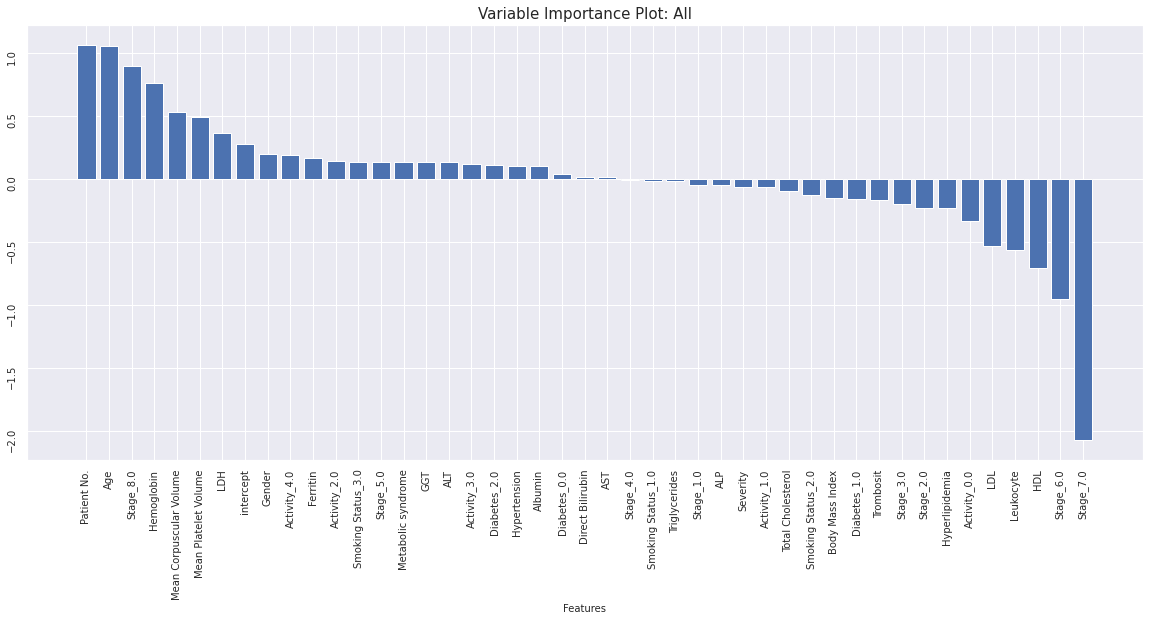

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Variable Importance Plot: All',fontsize=15)
plt.xlabel('Features',fontsize=10)
plt.yticks(fontsize=10, rotation=90)
plt.xticks(fontsize=10, rotation=90)
plt.bar(vif.variable, vif.coefficient)
plt.show()

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
#X_train, y_train = make_classification(n_samples=1000, random_state=0)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.996 (0.008)


## Model 2- important 15 features

In [ ]:
df1 = df[["Age", "Gender", "Body Mass Index","ALP", "ALT", "AST", "GGT", "Direct Bilirubin", "Activity", 
          "Stage", "Severity", "Diabetes", "Hypertension", "Smoking Status", "Hyperlipidemia", "LDH"]]


In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
df_dummy = pd.get_dummies(df1, columns=["Stage",  "Diabetes", "Smoking Status", "Activity"], drop_first=False)

In [ ]:
numeric_cols= ["Age", "Body Mass Index","ALP", "ALT", "AST", "GGT", "Direct Bilirubin", "LDH"]
cat_cols = list(set(df_dummy.columns) - set(numeric_cols))
cat_cols.sort()


In [ ]:
scaler = StandardScaler()
scaler.fit(df_dummy[numeric_cols])

def get_features_and_target_arrays(df, numeric_columns, cat_columns, scaler):
    df_numeric_scaled = scaler.transform(df[numeric_columns])
    df_categorical = df[cat_columns].to_numpy()
    df_output = np.hstack((df_numeric_scaled, df_categorical ))
    return df_output

df_test = get_features_and_target_arrays(df_dummy, numeric_cols, cat_cols, scaler)

In [ ]:
df_model =pd.DataFrame(df_test,columns=numeric_cols+cat_cols)

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.15, random_state=0)

In [ ]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[ 45,   0],
       [  0, 469]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 0, 77]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00       469

    accuracy                           1.00       514
   macro avg       1.00      1.00      1.00       514
weighted avg       1.00      1.00      1.00       514



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("The accuracy score is: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        77

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

The accuracy score is:  1.0


In [ ]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.01691
Feature: 1, Score: 0.08281
Feature: 2, Score: 0.09649
Feature: 3, Score: 0.13276
Feature: 4, Score: 0.08082
Feature: 5, Score: -0.21964
Feature: 6, Score: 0.28611
Feature: 7, Score: 0.15843
Feature: 8, Score: -1.03690
Feature: 9, Score: -2.05475
Feature: 10, Score: 0.95250
Feature: 11, Score: 1.10222
Feature: 12, Score: 1.03687
Feature: 13, Score: -0.18279
Feature: 14, Score: -0.00830
Feature: 15, Score: 0.19103
Feature: 16, Score: -0.05825
Feature: 17, Score: 0.02453
Feature: 18, Score: 0.36346
Feature: 19, Score: 3.54512
Feature: 20, Score: 0.07919
Feature: 21, Score: -0.03175
Feature: 22, Score: -0.04750
Feature: 23, Score: -0.80652
Feature: 24, Score: -0.67596
Feature: 25, Score: -0.38260
Feature: 26, Score: 0.70344
Feature: 27, Score: -0.17692
Feature: 28, Score: 0.65977
Feature: 29, Score: 0.51640
Feature: 30, Score: 0.16232


In [ ]:
coefficients = np.hstack((logreg.intercept_, logreg.coef_[0]))
vif = pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

In [ ]:
vif=vif.sort_values('coefficient',ascending=False).reset_index(drop=True).iloc[1:,:]

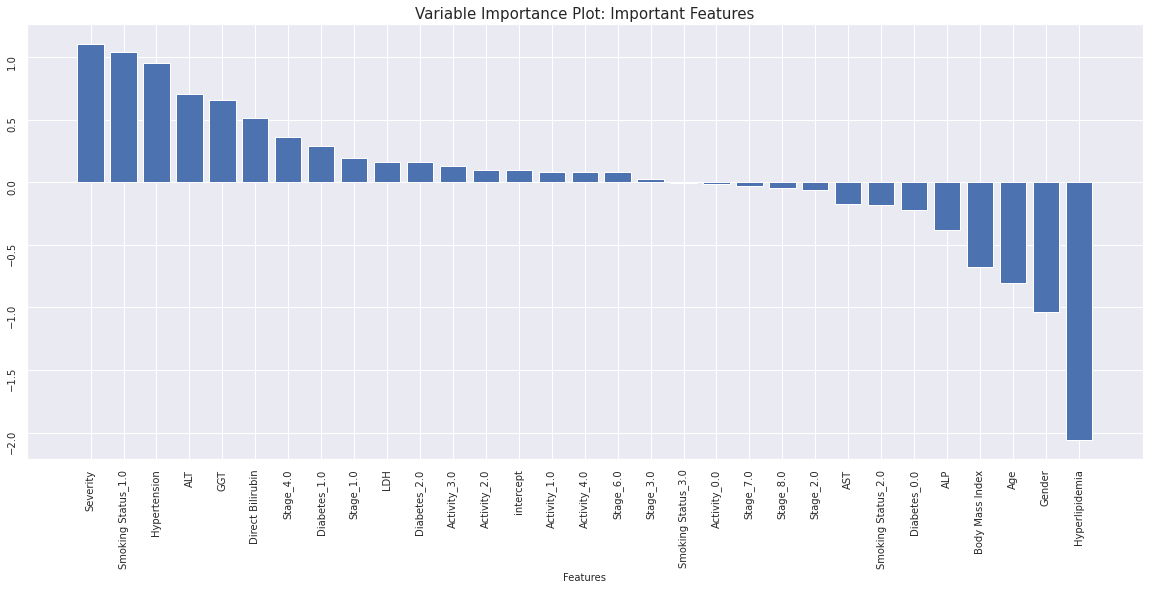

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Variable Importance Plot: Important Features',fontsize=15)
plt.xlabel('Features',fontsize=10)
plt.yticks(fontsize=10, rotation=90)
plt.xticks(fontsize=10, rotation=90)
plt.bar(vif.variable, vif.coefficient)
plt.show()

In [ ]:
scaler.mean_

array([4.63024793e+01, 3.18687107e+01, 1.08751656e+02, 7.65239669e+01,
       4.87236364e+01, 6.91212625e+01, 2.10000000e-01, 2.49231729e+02])

In [ ]:
 scaler.scale_

array([10.63734621,  5.10263056, 66.64176771, 49.37625659, 30.22332338,
       68.47027645,  0.16754918, 90.7312613 ])

In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logreg.feature_names_in_

array(['Age', 'Body Mass Index', 'ALP', 'ALT', 'AST', 'GGT',
       'Direct Bilirubin', 'LDH', 'Activity_0.0', 'Activity_1.0',
       'Activity_2.0', 'Activity_3.0', 'Activity_4.0', 'Diabetes_0.0',
       'Diabetes_1.0', 'Diabetes_2.0', 'Gender', 'Hyperlipidemia',
       'Hypertension', 'Severity', 'Smoking Status_1.0',
       'Smoking Status_2.0', 'Smoking Status_3.0', 'Stage_1.0',
       'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Stage_5.0', 'Stage_6.0',
       'Stage_7.0', 'Stage_8.0'], dtype=object)

In [ ]:
logreg.coef_

array([[-0.01690973,  0.08280968,  0.09648978,  0.13276421,  0.08081659,
        -0.219643  ,  0.28611292,  0.15843383, -1.03690349, -2.0547451 ,
         0.95249875,  1.10222028,  1.03687168, -0.18279139, -0.00830075,
         0.19103426, -0.05824508,  0.02453056,  0.36345696,  3.54512296,
         0.07918979, -0.03175098, -0.04749669, -0.80651523, -0.67596101,
        -0.38259523,  0.70344257, -0.17691779,  0.65976745,  0.51640488,
         0.16231647]])

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
#X_train, y_train = make_classification(n_samples=1000, random_state=0)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.3, random_state=0)
logreg_1= LogisticRegression()
logreg_1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/pytho

LogisticRegression()

In [ ]:
logreg_1.feature_names_in_

array(['Age', 'Body Mass Index', 'ALP', 'ALT', 'AST', 'GGT',
       'Direct Bilirubin', 'LDH', 'Activity_0.0', 'Activity_1.0',
       'Activity_2.0', 'Activity_3.0', 'Activity_4.0', 'Diabetes_0.0',
       'Diabetes_1.0', 'Diabetes_2.0', 'Gender', 'Hyperlipidemia',
       'Hypertension', 'Severity', 'Smoking Status_1.0',
       'Smoking Status_2.0', 'Smoking Status_3.0', 'Stage_1.0',
       'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Stage_5.0', 'Stage_6.0',
       'Stage_7.0', 'Stage_8.0'], dtype=object)

In [ ]:
importance = logreg_1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.08953
Feature: 1, Score: 0.17504
Feature: 2, Score: 0.07746
Feature: 3, Score: 0.12436
Feature: 4, Score: 0.07301
Feature: 5, Score: -0.22625
Feature: 6, Score: 0.22679
Feature: 7, Score: 0.10564
Feature: 8, Score: -0.84846
Feature: 9, Score: -2.03561
Feature: 10, Score: 0.85574
Feature: 11, Score: 1.03604
Feature: 12, Score: 0.99228
Feature: 13, Score: -0.18176
Feature: 14, Score: 0.02984
Feature: 15, Score: 0.15189
Feature: 16, Score: -0.06790
Feature: 17, Score: 0.06754
Feature: 18, Score: 0.38670
Feature: 19, Score: 3.36296
Feature: 20, Score: 0.06501
Feature: 21, Score: -0.02195
Feature: 22, Score: -0.04308
Feature: 23, Score: -0.81008
Feature: 24, Score: -0.73975
Feature: 25, Score: -0.38836
Feature: 26, Score: 0.68626
Feature: 27, Score: -0.09415
Feature: 28, Score: 0.67420
Feature: 29, Score: 0.51598
Feature: 30, Score: 0.15587


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
## Feature Names- 'Age', 'Gender', 'Body Mass Index', 'ALP', 'ALT', 'AST', 'GGT', 'Direct Bilirubin', 'Albumin', 'Stage', 'Diabetes', 'Hypertension','Smoking Status'


Accuracy of logistic regression classifier on test set: 1.00


In [ ]:
features

['Age',
 'Body Mass Index',
 'ALP',
 'ALT',
 'AST',
 'GGT',
 'Direct Bilirubin',
 'LDH',
 'Activity_0.0',
 'Activity_1.0',
 'Activity_2.0',
 'Activity_3.0',
 'Activity_4.0',
 'Diabetes_0.0',
 'Diabetes_1.0',
 'Diabetes_2.0',
 'Gender',
 'Hyperlipidemia',
 'Hypertension',
 'Smoking Status_1.0',
 'Smoking Status_2.0',
 'Smoking Status_3.0',
 'Stage_1.0',
 'Stage_2.0',
 'Stage_3.0',
 'Stage_4.0',
 'Stage_5.0',
 'Stage_6.0',
 'Stage_7.0',
 'Stage_8.0']

In [ ]:
df['Severity'].unique()

array(['1', '0'], dtype=object)

In [ ]:
coefficients = np.hstack((logreg_1.intercept_, logreg_1.coef_[0]))
vif = pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})
vif=vif.sort_values('coefficient',ascending=False).reset_index(drop=True).iloc[1:,:]

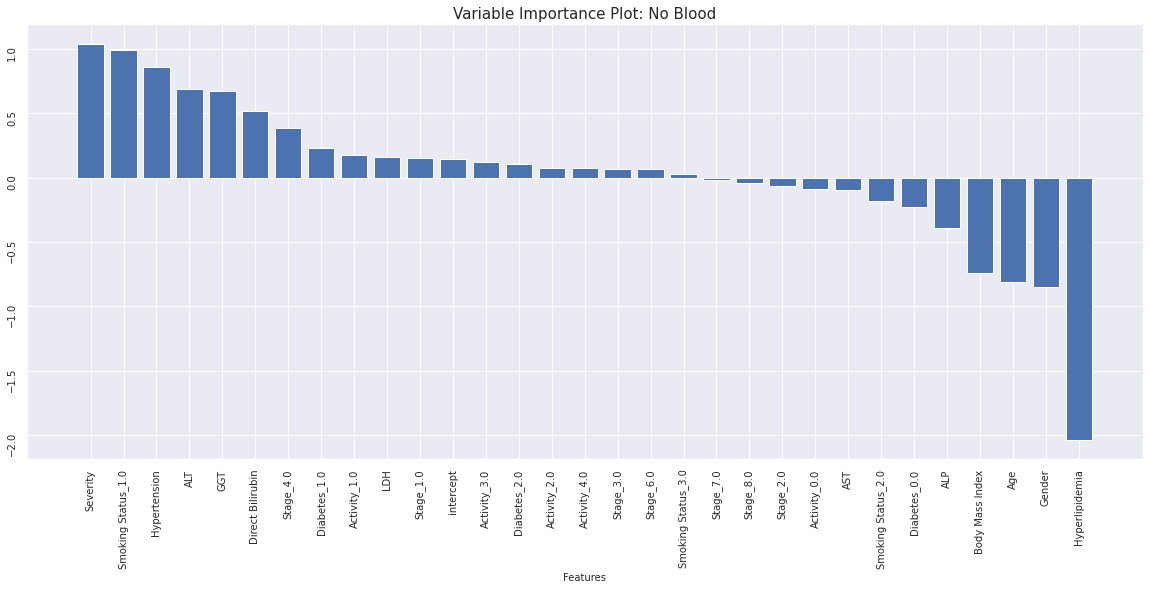

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Variable Importance Plot: No Blood',fontsize=15)
plt.xlabel('Features',fontsize=10)
plt.yticks(fontsize=10, rotation=90)
plt.xticks(fontsize=10, rotation=90)
plt.bar(vif.variable, vif.coefficient)
plt.show()

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.15, random_state=0)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
# X_train, y_train = make_classification(n_samples=1000, random_state=0)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


## Model 2*- with important features

In [ ]:
df2 = df[["Activity", "Stage", "Hypertension", 'Direct Bilirubin', "Gender", "Body Mass Index",  "Severity", "Diabetes",  "Smoking Status"]]

In [ ]:
df2

,Activity,Stage,Hypertension,Direct Bilirubin,Gender,Body Mass Index,Severity,Diabetes,Smoking Status
0,2.0,5.0,1.0,0.85,0,35.56,1,0.0,2.0
1,2.0,4.0,0.0,0.09,0,30.78,1,0.0,1.0
2,2.0,7.0,1.0,0.28,1,34.95,1,0.0,2.0
3,2.0,5.0,0.0,0.10,1,31.02,1,0.0,2.0
4,2.0,4.0,0.0,0.23,1,25.91,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...
600,4.0,5.0,1.0,0.14,0,37.78,1,0.0,1.0
601,4.0,5.0,1.0,0.20,1,28.61,1,1.0,2.0
602,4.0,7.0,0.0,0.07,0,40.30,1,2.0,1.0
603,4.0,7.0,0.0,0.07,0,40.35,1,2.0,1.0


In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
df_dummy_2 = pd.get_dummies(df2, columns=['Activity', 'Stage',  "Diabetes",  "Smoking Status"], drop_first=False)

In [ ]:
df_dummy_2

,Hypertension,Direct Bilirubin,Gender,Body Mass Index,Severity,Activity_0.0,Activity_1.0,Activity_2.0,Activity_3.0,Activity_4.0,...,Stage_5.0,Stage_6.0,Stage_7.0,Stage_8.0,Diabetes_0.0,Diabetes_1.0,Diabetes_2.0,Smoking Status_1.0,Smoking Status_2.0,Smoking Status_3.0
0,1.0,0.85,0,35.56,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.0,0.09,0,30.78,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,0.28,1,34.95,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0.0,0.10,1,31.02,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.0,0.23,1,25.91,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.0,0.14,0,37.78,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
601,1.0,0.20,1,28.61,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
602,0.0,0.07,0,40.30,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
603,0.0,0.07,0,40.35,1,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
numeric_cols= ['Body Mass Index', 'Direct Bilirubin']
cat_cols = list(set(df_dummy_2.columns) - set(numeric_cols))
cat_cols.sort()

In [ ]:

scaler = StandardScaler()
scaler.fit(df_dummy_2[numeric_cols])

def get_features_and_target_arrays(df, numeric_columns, cat_columns, scaler):
    df_numeric_scaled = scaler.transform(df[numeric_columns])
    df_categorical = df[cat_columns].to_numpy()
    df_output = np.hstack((df_numeric_scaled, df_categorical ))
    return df_output

df_test = get_features_and_target_arrays(df_dummy_2, numeric_cols, cat_cols, scaler)

In [ ]:
df_model = pd.DataFrame(df_test,columns=numeric_cols+cat_cols)

In [ ]:
pd.DataFrame(df_test)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.723409,3.819774,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-0.213363,-0.716208,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.603863,0.417788,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,-0.166328,-0.656524,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,-1.167772,0.119368,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.158479,-0.417788,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
601,-0.638633,-0.059684,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
602,1.652342,-0.835576,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
603,1.662141,-0.835576,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_model.columns

Index(['Body Mass Index', 'Direct Bilirubin', 'Activity_0.0', 'Activity_1.0',
       'Activity_2.0', 'Activity_3.0', 'Activity_4.0', 'Diabetes_0.0',
       'Diabetes_1.0', 'Diabetes_2.0', 'Gender', 'Hypertension', 'Severity',
       'Smoking Status_1.0', 'Smoking Status_2.0', 'Smoking Status_3.0',
       'Stage_1.0', 'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Stage_5.0',
       'Stage_6.0', 'Stage_7.0', 'Stage_8.0'],
      dtype='object')

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.3, random_state=0)

In [ ]:
logreg_2= LogisticRegression()
logreg_2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/pytho

LogisticRegression()

In [ ]:
y_pred_train = logreg_2.predict(X_train)
y_pred = logreg_2.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[ 38,   0],
       [  0, 385]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 21,   0],
       [  0, 161]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       161

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [ ]:
logreg_2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logreg_2.feature_names_in_

array(['Body Mass Index', 'Direct Bilirubin', 'Activity_0.0',
       'Activity_1.0', 'Activity_2.0', 'Activity_3.0', 'Activity_4.0',
       'Diabetes_0.0', 'Diabetes_1.0', 'Diabetes_2.0', 'Gender',
       'Hypertension', 'Severity', 'Smoking Status_1.0',
       'Smoking Status_2.0', 'Smoking Status_3.0', 'Stage_1.0',
       'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Stage_5.0', 'Stage_6.0',
       'Stage_7.0', 'Stage_8.0'], dtype=object)

In [ ]:
logreg_2.coef_

array([[ 0.19883792,  0.2437549 , -0.89655003, -2.06514224,  0.86569756,
         1.05620522,  1.03973934, -0.19452051,  0.02674961,  0.16772075,
        -0.03652354,  0.25334291,  3.4225269 ,  0.08397015, -0.01757663,
        -0.06644367, -0.81455892, -0.65960676, -0.34982561,  0.69107045,
        -0.12881495,  0.64029761,  0.49345905,  0.127929  ]])

In [ ]:
importance = logreg_2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.19884
Feature: 1, Score: 0.24375
Feature: 2, Score: -0.89655
Feature: 3, Score: -2.06514
Feature: 4, Score: 0.86570
Feature: 5, Score: 1.05621
Feature: 6, Score: 1.03974
Feature: 7, Score: -0.19452
Feature: 8, Score: 0.02675
Feature: 9, Score: 0.16772
Feature: 10, Score: -0.03652
Feature: 11, Score: 0.25334
Feature: 12, Score: 3.42253
Feature: 13, Score: 0.08397
Feature: 14, Score: -0.01758
Feature: 15, Score: -0.06644
Feature: 16, Score: -0.81456
Feature: 17, Score: -0.65961
Feature: 18, Score: -0.34983
Feature: 19, Score: 0.69107
Feature: 20, Score: -0.12881
Feature: 21, Score: 0.64030
Feature: 22, Score: 0.49346
Feature: 23, Score: 0.12793


In [ ]:
feature_imp={}
for i in range(0,len(logreg_2.feature_names_in_)):
  feature_imp[logreg_2.feature_names_in_[i]]=logreg_2.coef_[0][i]
values=list(feature_imp.values())
keys=list(feature_imp.keys())
feature_sorted=[keys[values.index(x)] for x in sorted(values,reverse=True)]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       385

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       161

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [ ]:
coefficients = np.hstack((logreg_2.intercept_, logreg_2.coef_[0]))
vif=pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})


In [ ]:
vif=vif.sort_values('coefficient',ascending=False).reset_index(drop=True).iloc[1:,:]#[vif.variable.str.contains('Stage')].coefficient

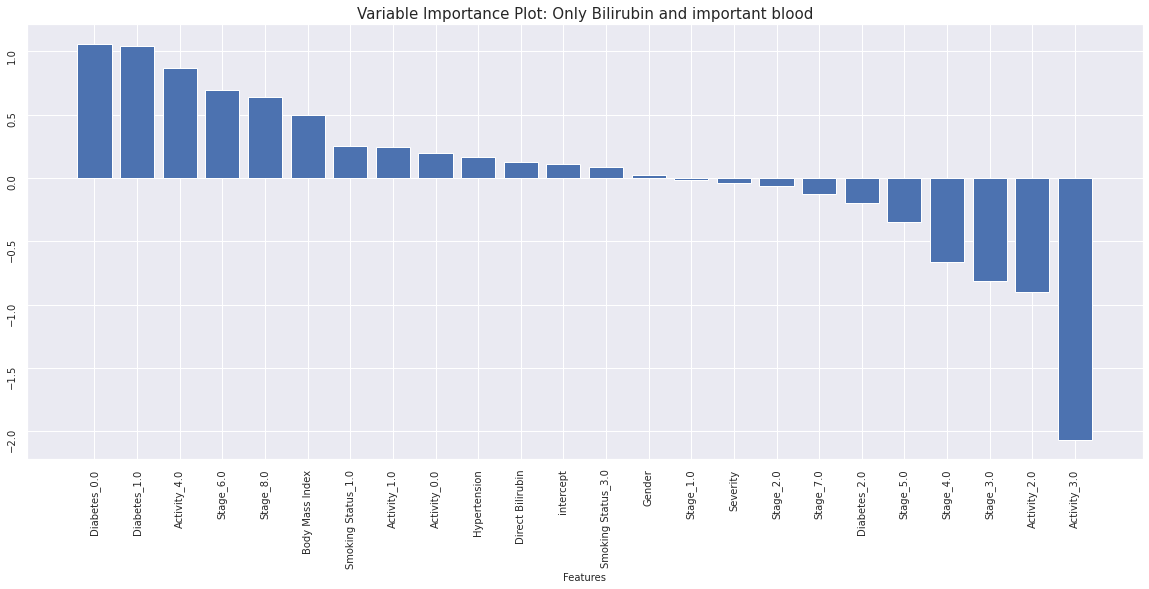

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Variable Importance Plot: Only Bilirubin and important blood',fontsize=15)
plt.xlabel('Features',fontsize=10)
plt.yticks(fontsize=10, rotation=90)
plt.xticks(fontsize=10, rotation=90)
plt.bar(vif.variable, vif.coefficient)
plt.show()

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
#X_train, y_train = make_classification(n_samples=1000, random_state=0)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


## Model 3- No blood

In [ ]:
df3 = df[["Activity", "Stage", "Hypertension", "Gender", "Body Mass Index",  "Severity", "Diabetes",  "Smoking Status"]]

In [ ]:
df_dummy = pd.get_dummies(df3, columns=['Activity', 'Stage',  "Diabetes",  "Smoking Status"], drop_first=False)

In [ ]:
df_dummy

,Hypertension,Gender,Body Mass Index,Severity,Activity_0.0,Activity_1.0,Activity_2.0,Activity_3.0,Activity_4.0,Stage_1.0,...,Stage_5.0,Stage_6.0,Stage_7.0,Stage_8.0,Diabetes_0.0,Diabetes_1.0,Diabetes_2.0,Smoking Status_1.0,Smoking Status_2.0,Smoking Status_3.0
0,1.0,0,35.56,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.0,0,30.78,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1,34.95,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0.0,1,31.02,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.0,1,25.91,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.0,0,37.78,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
601,1.0,1,28.61,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
602,0.0,0,40.30,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
603,0.0,0,40.35,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0


In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [ ]:
numeric_cols = ['Body Mass Index']
cat_cols = list(set(df_dummy.columns) - set(numeric_cols))
cat_cols.sort()

In [ ]:
scaler = StandardScaler()
scaler.fit(df_dummy[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    df_numeric_scaled = scaler.transform(df[numeric_cols])
    df_categorical = df[cat_cols].to_numpy()
    df_output = np.hstack((df_numeric_scaled, df_categorical ))
    return df_output

df_test = get_features_and_target_arrays(df_dummy, numeric_cols, cat_cols, scaler)


In [ ]:
df_model =pd.DataFrame(df_test,columns=numeric_cols+cat_cols)

In [ ]:
len(df_model.columns)

23

In [ ]:
df_model['Body Mass Index'].mean()

-5.5419397262280544e-17

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2, random_state=0)

In [ ]:
df_model[features]

,Body Mass Index,Activity_0.0,Activity_1.0,Activity_2.0,Activity_3.0,Activity_4.0,Diabetes_0.0,Diabetes_1.0,Diabetes_2.0,Gender,...,Smoking Status_2.0,Smoking Status_3.0,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Stage_5.0,Stage_6.0,Stage_7.0,Stage_8.0
0,0.723409,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-0.213363,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.603863,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,-0.166328,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,-1.167772,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.158479,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
601,-0.638633,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
602,1.652342,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
603,1.662141,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
logreg_3= LogisticRegression()
logreg_3.fit(X_train, y_train)

In [ ]:
y_pred_train = logreg_3.predict(X_train)
y_pred = logreg_3.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[ 44,   0],
       [  0, 440]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 15,   0],
       [  0, 106]])

In [ ]:
df_model.columns

Index(['Body Mass Index', 'Activity_0.0', 'Activity_1.0', 'Activity_2.0',
       'Activity_3.0', 'Activity_4.0', 'Diabetes_0.0', 'Diabetes_1.0',
       'Diabetes_2.0', 'Gender', 'Hypertension', 'Severity',
       'Smoking Status_1.0', 'Smoking Status_2.0', 'Smoking Status_3.0',
       'Stage_1.0', 'Stage_2.0', 'Stage_3.0', 'Stage_4.0', 'Stage_5.0',
       'Stage_6.0', 'Stage_7.0', 'Stage_8.0'],
      dtype='object')

In [ ]:
y_train

165    1
499    1
90     1
525    0
443    0
      ..
277    1
9      1
359    1
192    1
559    1
Name: Severity, Length: 484, dtype: object

In [ ]:
y_test

573    1
52     0
528    0
343    1
55     0
      ..
548    1
477    1
293    1
491    1
278    1
Name: Severity, Length: 121, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00       440

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
print("The accuracy score is: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       106

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

The accuracy score is:  1.0


In [ ]:
importance = logreg_3.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
 # This is the 0th object in the decision function 
 # For a one unit change in Feature X, I would expect an B unit change in the outcome.
 # For a one unit change in the Activity 1.0, I would expect the likelihood of NAFLD severity to increase by 3.57 times.
 # Slight risk of overfitting

Feature: 0, Score: 0.14045
Feature: 1, Score: -1.03398
Feature: 2, Score: -2.14118
Feature: 3, Score: 0.93010
Feature: 4, Score: 1.13620
Feature: 5, Score: 1.10884
Feature: 6, Score: -0.19309
Feature: 7, Score: -0.02388
Feature: 8, Score: 0.21694
Feature: 9, Score: -0.02514
Feature: 10, Score: 0.25232
Feature: 11, Score: 3.56854
Feature: 12, Score: 0.07927
Feature: 13, Score: -0.01152
Feature: 14, Score: -0.06777
Feature: 15, Score: -0.76854
Feature: 16, Score: -0.63414
Feature: 17, Score: -0.31876
Feature: 18, Score: 0.68976
Feature: 19, Score: -0.20271
Feature: 20, Score: 0.62328
Feature: 21, Score: 0.48172
Feature: 22, Score: 0.12937


In [ ]:
len(logreg_3.coef_[0])

23

In [ ]:
coefficients = np.hstack((logreg_3.intercept_, logreg_3.coef_[0]))
vif = pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})


In [ ]:
vif=vif.sort_values('coefficient',ascending=False).reset_index(drop=True).iloc[1:,:]#[vif.variable.str.contains('Stage')].coefficient

In [ ]:
# feature_imp={}
# for i in range(0,len(logreg_3.feature_names_in)):
#   feature_imp[logreg_3.feature_names_in_[i]]=logreg_3.coef_[0][i]
# values=list(feature_imp.values())
# keys=list(feature_imp.keys())
# feature_sorted=[keys[values.index(x)] for x in sorted(values,reverse=True)]

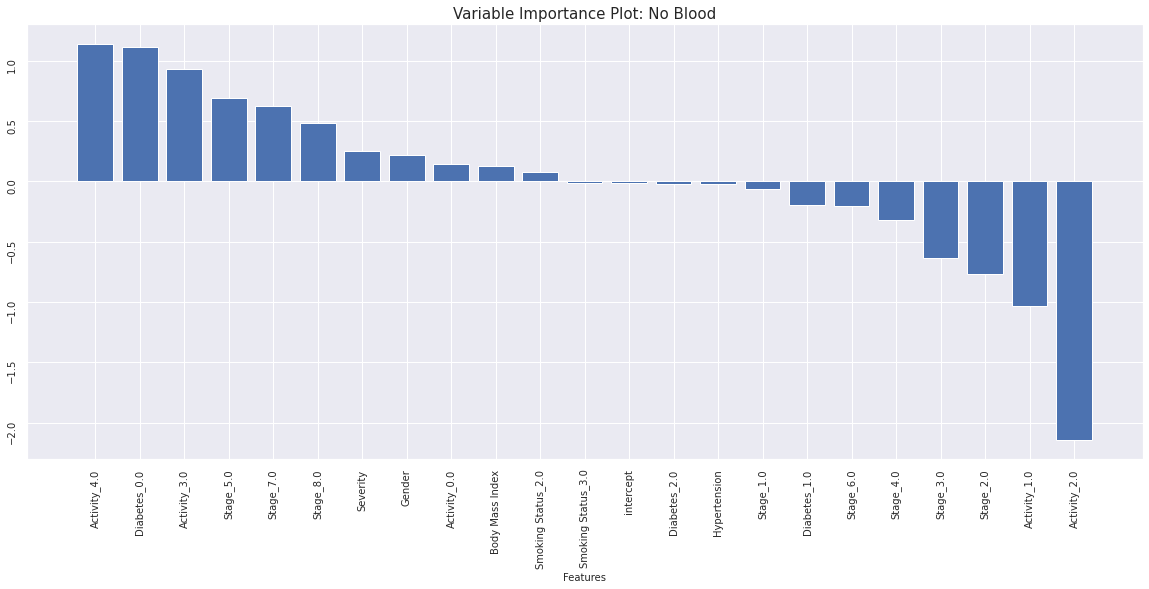

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Variable Importance Plot: No Blood',fontsize=15)
plt.xlabel('Features',fontsize=10)
plt.yticks(fontsize=10, rotation=90)
plt.xticks(fontsize=10, rotation=90)
plt.bar(vif.variable, vif.coefficient)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



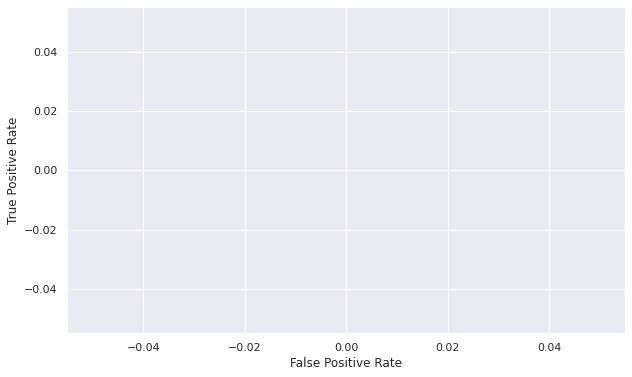

In [ ]:
#define metrics
y_pred_proba = logreg_3.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba,pos_label=1)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 
 # Just happens to be no positives here - this would work if there were any


# evaluate a logistic regression model using k-fold cross-validation

In [ ]:
features=[x for x in df_model.columns if x!='Severity']
X,y=df_model[features],df_model['Severity']
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.15, random_state=0)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
# X_train, y_train = make_classification(n_samples=1000, random_state=0)

In [ ]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


* The accuracy was 1
* After kfold with x splits and shuffling we found the accuracy dropped to 0.944 
* Therefore we conclude that the sample although being a good representation of the FLD population but to use it for prediction of FLD progression would need a larger dataset to train and test particularly of non-FLD patients to see the importance and role of blood reports and various other features, as we get more variance. 
* To further reduce the risk of overfitting, aditional data could be collected. etc. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



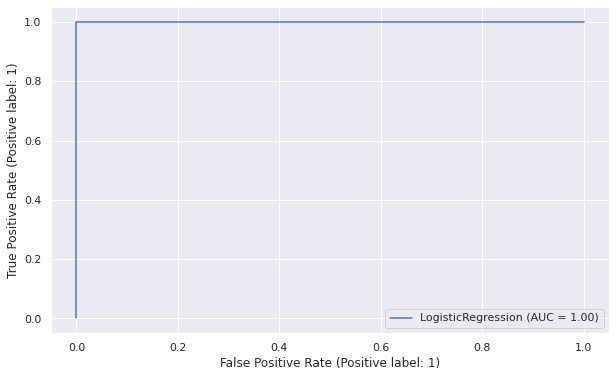

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg_3,X_test,y_test)

* This ROC curve should work under normal circumstances but since we are recieving perfect confusion matrices, this output is not able to trace a pattern.
This is perfect! This model is potentially too good. Further work should be done to address the risk of overfitting and to find a cohort with a higher sample and variance among/within cases. 

# 6.0: Ethical Considerations


### 6.1: What ethical concerns, if any, may arrive as you consider your problem statement? 
As we consider our problem statement, there are a few ethical concerns that we will have to deal with as part of our project, and they relate to how the data is collected, stored, and used. First off, is the privacy of the data once it is collected. A concern in this case would be keeping that data safe and ensuring that outside parties do not have any access to the information of others. There is always the risk to the users if their data gets stolen by others with the system being hacked and there being a breach in security. This information is personal, so ensuring that the data is private, only available to those who should have access, have access. Second is the concern that the data will be misused. This concern stems from the fact that our data analysis doesn’t directly benefit the users, though they might believe that it does. Users may feel misled if this occurs, so it is important that the data is used effectively. Finally, there is the risk that our data is used to increase the marginalization of certain communities such as those older or younger, overweight or underweight, or others. If the data is not categorized properly or obtained in a way that is consistent, it can skew in a certain direction showing results that are not indicative of the population. Therefore, when analyzing the results would be inaccurate and lead to improper conclusions.	
### 6.2 Who might be affected? 
The people who may be affected by this include any potential at risk or marginalized groups. Our data may be seen to imply that those groups are at a higher risk for one surface level reason or another, and ignore a deeper route cause. These individuals could be constantly at risk, regardless of if we are in an early, mid, or late stage of our data gathering and analysis, and thus could affect customers both in the early stages as well as future customers.
### 6.3 Do your conclusions warrant any ethical considerations?
Any conclusions we make could be intentionally or unintentionally misinterpreted to show that certain groups that we have segmented for ease of analysis are inherently worse groups of people due to the burden of their increased health risk draining insurance and hospital time or other reasons. 
### 6.4. How might your model be abused by a bad-faith actor?
 
Incorrect data input
Someone could purposely input incorrect data. Once the inaccurate and inconsistent data get into the company's various databases, even if the system is making the right decision based on the wrong data, it is actually making a wrong decision
Information leak
Basic privacy (basic data): including name, ID number, personal address, etc. 
Medical privacy, contents related to medical institutions like abortions, AIDStest results, allergy information
High-value privacy that can be inferred from medical data: information on immediate family members, time of pregnancy and maternity, car accident information (e.g. crashed into the emergency room), photos of private body parts.
The leak of these pieces of information into a bad-faith actor could put risk on personal safety, social hazards like an explosion of infectious diseases, and health information of important government leaders
### 6.5 Are there risks of bias in your data? 
* There are risks of bias in our data, since we are working with data which is from a research study which was only conducted locally within a student community; it’s biased towards a particular age, gender, BMI, etc. How well it would do on new data on people from other regions is also questionable. We also only have datasets from people willing to answer the survey and there could be a major psychological bias between the people who did not respond to the survey. A list of probable biases is given below:
* Cognitive bias
* Prejudices
* Contextual bias
* Unconscious or implicit bias
* Statistical bias
* Conscious bias
* Unconscious bias
* Actor-observer bias
* Furthermore, as the model we are generating is a prediction based model there may be deviations in the LGBTQ+ community if gender is recorded. If the predictive results are more frequently positive for them; there could be a potential bias, whereas the actual cause is something else but viewers might notice or associate LGBTQ+ banners and have a bias. This will cause systematic biases eventually. Similarly, for weight and age it might lead to fat shaming biases, and ageism biases respectively.



# 7.0: Conclusion and Final Thoughts

Though we have a major list of probable biases as listed in the last question, we believe that the features which would directly impact our model would be fewer in number. We estimate conscious bias and statistical bias like gender, race, age, geographical location biases etc. would be the few which we will encounter in the early phases of the model creation and implementation. We would try to counter those biases by establishing balance in the dataset if there’s an imbalance of any feature. For example, if we identify any bias in gender, age or race- we can try to gather data from the marginalized communities by targeted surveys or dataset merging from research studies of the community. To address the conscious bias, we would try to educate people and try to position the product using the model in a way such that no stigma is created for any particular group of people. 


Across the 4- 5 models we definitely see a very high impact of features like Activity, Gender. Although the models go against the initial assumption that BMI is a huge factor to predict the severity of FLD.

From the pattern we see in the various stages, we now can conclude that the Severity is not what we initially understood it to be. As we see a huge spike in importance of Stage 2,5 and 7- we can say that here Severity means the probabilty of progressing in the stages of the disease. That would explain why we see low importance of the factors like Stage 8 because the patients are already in severe, so their probability of progressing further is not high for obvious reasons -"Where else can they go from being severe". But Stages 2,5 and 7 are pivoting stages in FLD from Steatosis to Nash to Cirrohosis. Since the patients are already in the brink of the next stage so their severity risk or chances are higher/ they are more prone to further worsening. That being said, since with all the four models, we recieved such a high precision score can indicate overfitting. We will need to generate and train the model with more data points, preferably of the people who do not have FLD to see the results and understand the constraints.



### Future work 
* Additional work should be performed to correct the imbalence of the data, both by class and by detectable predictors (don't match the population).
* As mentioned, we would love to understand the potential of this problem statement and prediction, with Neural Network (particularly CNN) for visualizing the USG data from the livers to try to improvize external progression tracking.
* We believe this problem would be best addressed with a more diverse and global cohort. It would be really interesting to observe patterns in BMI, AST, ALT etc. when the standardization gets broader. 
* We also can generate synthetic data generation to prevent this imbalance.

With all that, we can definitely see the prospect of such predictions being used in our app, as suggested to gain more data points and also make progression checking with daily habits and external factors easier for patients and would eliminate the need of constant biopsies in future. 
